# Section 1: 

@AUTHOR: Kangle Yuan 20178699 psyky2@nottingham.ac.uk

# Q1:
Can we predict whether human-powered pumps are more likely to fail in regions with a high population?

@AUTHOR: Kangle Yuan 20178699 psyky2@nottingham.ac.uk

# 1. Getting started with Data Analysis-Importing the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

features = pd.read_csv('./trainingset.csv', index_col=0)

#drop the duplicate
features = features.drop_duplicates()

labels = pd.read_csv('./traingsetlabel.csv', index_col=0)

#combine the dataset
df = pd.merge(features, labels, on='id')
df.head()



,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [2]:
print(df.shape)

(59363, 40)


# 2. Data Pre-processing/Data Cleaning/Data Wrangling

## deal with missing value

In [3]:
import numpy as np
df.replace('?',np.NaN,inplace = True)


In [4]:
missingdata = df.notnull()
missingdata.head(3)

for column in missingdata.columns.values.tolist():
    print(column)
    print (missingdata[column].value_counts())
    print("") 

amount_tsh
True    59363
Name: amount_tsh, dtype: int64

date_recorded
True    59363
Name: date_recorded, dtype: int64

funder
True     55728
False     3635
Name: funder, dtype: int64

gps_height
True    59363
Name: gps_height, dtype: int64

installer
True     55708
False     3655
Name: installer, dtype: int64

longitude
True    59363
Name: longitude, dtype: int64

latitude
True    59363
Name: latitude, dtype: int64

wpt_name
True    59363
Name: wpt_name, dtype: int64

num_private
True    59363
Name: num_private, dtype: int64

basin
True    59363
Name: basin, dtype: int64

subvillage
True     58992
False      371
Name: subvillage, dtype: int64

region
True    59363
Name: region, dtype: int64

region_code
True    59363
Name: region_code, dtype: int64

district_code
True    59363
Name: district_code, dtype: int64

lga
True    59363
Name: lga, dtype: int64

ward
True    59363
Name: ward, dtype: int64

population
True    59363
Name: population, dtype: int64

public_meeting
True     56049
F

funder, installer, subvillage, public_meeting, scheme_management, scheme_name, permit have missing values

In [5]:
columns = ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']

# percentage of missing values in each column
for col in columns:
    pct_missing = df[col].isnull().mean() * 100
    print(f'{col}: {pct_missing}%')

funder: 6.123342822970537%
installer: 6.157033842629247%
subvillage: 0.6249684146690699%
public_meeting: 5.582601957448243%
scheme_management: 6.531004160840928%
scheme_name: 47.39989555783906%
permit: 5.147987803850883%


In [6]:
#Percentage of missing values in each row
# missing_percentage = df.isnull().mean(axis=1) * 100

# df = df[missing_percentage < 1]
# df
#df.dropna()

In [7]:
#the missing value is too many
df = df.drop('scheme_name', axis=1)

scheme management can be replace by management column, so drop scheme management, as scheme management has Nan

In [8]:
df['management'].unique()

array(['vwc', 'wug', 'other', 'private operator', 'water board', 'wua',
       'company', 'water authority', 'parastatal', 'unknown',
       'other - school', 'trust'], dtype=object)

In [9]:
df['management'].nunique()

12

In [10]:
df['scheme_management'].unique()

array(['VWC', 'Other', nan, 'Private operator', 'WUG', 'Water Board',
       'WUA', 'Water authority', 'Company', 'Parastatal', 'Trust', 'SWC',
       'None'], dtype=object)

In [11]:
df['scheme_management'].nunique()

12

In [12]:
df = df.drop('scheme_management', axis=1)

the subvillage has only too few missing value, just delete the rows

In [13]:
df.dropna(subset=['subvillage'], inplace=True)

In [14]:
# #row will be dropped if it has more than 2 missing values, 5%
# df.dropna(thresh=df.shape[1]-2, inplace=True)
# df

In [15]:
columns = ['funder', 'installer', 'subvillage', 'public_meeting', 'permit']

# percentage of missing values in each column
for col in columns:
    pct_missing = df[col].isnull().mean() * 100
    print(f'{col}: {pct_missing}%')

funder: 6.161852454570111%
installer: 6.1957553566585295%
subvillage: 0.0%
public_meeting: 5.616015730946569%
permit: 5.180363439110388%


In [16]:
df.shape

(58992, 38)

In [17]:
#Percentage of missing values in each row
missing_percentage = df.isnull().mean(axis=1) * 100
df = df[missing_percentage < 1]
df.shape

(51670, 38)

In [18]:
missingdata = df.notnull()
missingdata.head(3)

for column in missingdata.columns.values.tolist():
    print(column)
    print (missingdata[column].value_counts())
    print("") 

amount_tsh
True    51670
Name: amount_tsh, dtype: int64

date_recorded
True    51670
Name: date_recorded, dtype: int64

funder
True    51670
Name: funder, dtype: int64

gps_height
True    51670
Name: gps_height, dtype: int64

installer
True    51670
Name: installer, dtype: int64

longitude
True    51670
Name: longitude, dtype: int64

latitude
True    51670
Name: latitude, dtype: int64

wpt_name
True    51670
Name: wpt_name, dtype: int64

num_private
True    51670
Name: num_private, dtype: int64

basin
True    51670
Name: basin, dtype: int64

subvillage
True    51670
Name: subvillage, dtype: int64

region
True    51670
Name: region, dtype: int64

region_code
True    51670
Name: region_code, dtype: int64

district_code
True    51670
Name: district_code, dtype: int64

lga
True    51670
Name: lga, dtype: int64

ward
True    51670
Name: ward, dtype: int64

population
True    51670
Name: population, dtype: int64

public_meeting
True    51670
Name: public_meeting, dtype: int64

recorded_by
Tr

there is no missing values

### Duplicates

In [19]:
df[df.duplicated(keep=False)]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,


there is no duplicated rows

### working on overlapping column

some columns might have high overlapping based on their names, just keep one of them if they are

waterpoint_type vs. waterpoint_type_group

In [20]:
overlap = sum(df['waterpoint_type'] == df['waterpoint_type_group'])
percentage_overlap = (overlap / len(df)) * 100
print(percentage_overlap)

89.37874975808012


In [21]:
# drop type, because they are too similar, and group is more concise
df = df.drop('waterpoint_type', axis=1)

extraction_type vs. extraction_type_group vs. extraction_type_class

In [22]:
overlap = sum(df['extraction_type'] == df['extraction_type_group'])
percentage_overlap = (overlap / len(df)) * 100
print(percentage_overlap)

95.80220630927036


In [23]:
overlap = sum(df['extraction_type_class'] == df['extraction_type_group'])
percentage_overlap = (overlap / len(df)) * 100
print(percentage_overlap)

66.66150570930908


In [24]:
overlap = sum(df['extraction_type'] == df['extraction_type_class'])
percentage_overlap = (overlap / len(df)) * 100
print(percentage_overlap)

63.34430036771821


In [25]:
print(df['extraction_type_group'].unique())
print(df['extraction_type_group'].nunique())
print(df['extraction_type'].unique())
print(df['extraction_type'].nunique())
print(df['extraction_type_class'].unique())
print(df['extraction_type_class'].nunique())

['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'wind-powered' 'afridev' 'rope pump' 'mono' 'india mark iii'
 'other handpump' 'other motorpump']
13
['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'ksb'
 'other' 'windmill' 'afridev' 'other - rope pump' 'mono' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']
18
['gravity' 'submersible' 'handpump' 'other' 'wind-powered' 'rope pump'
 'motorpump']
7


Based on the results above, we can tell they are similar to each other, but the extraction_type_class has the least unique numbers, which is better for data pre-processing purpose.

In [26]:
df = df.drop('extraction_type_group', axis=1)
#because class is more concise and direct
df = df.drop('extraction_type', axis=1)

quantity vs quantity_group

In [27]:
overlap = sum(df['quantity'] == df['quantity_group'])
percentage_overlap = (overlap / len(df)) * 100
print(percentage_overlap)

100.0


In [28]:
df = df.drop('quantity', axis=1)

source vs. source_type

In [29]:
overlap = sum(df['source'] == df['source_type'])
percentage_overlap = (overlap / len(df)) * 100
print(percentage_overlap)

62.87013741048965


In [30]:
df['source'].unique()

array(['spring', 'dam', 'machine dbh', 'rainwater harvesting', 'other',
       'shallow well', 'river', 'hand dtw', 'lake', 'unknown'],
      dtype=object)

In [31]:
df['source_type'].unique()

array(['spring', 'dam', 'borehole', 'rainwater harvesting', 'other',
       'shallow well', 'river/lake'], dtype=object)

In [32]:
#type seems more like a summary
df = df.drop('source', axis=1)

payment vs. payment_type

In [33]:
overlap = sum(df['payment'] == df['payment_type'])
percentage_overlap = (overlap / len(df)) * 100
print(percentage_overlap)

55.06676988581381


In [34]:
df['payment'].unique()

array(['pay annually', 'pay per bucket', 'never pay', 'unknown',
       'pay when scheme fails', 'other', 'pay monthly'], dtype=object)

In [35]:
df['payment_type'].unique()

array(['annually', 'per bucket', 'never pay', 'unknown', 'on failure',
       'other', 'monthly'], dtype=object)

In [36]:
df = df.drop('payment', axis=1)

In [37]:
print(df['management'].unique())
print(df['management'].nunique())
print(df['management_group'].unique())
print(df['management_group'].nunique())

overlap = sum(df['management_group'] == df['management'])
percentage_overlap = (overlap / len(df)) * 100
print(percentage_overlap)

['vwc' 'other' 'wug' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust']
12
['user-group' 'other' 'commercial' 'parastatal' 'unknown']
5
4.306173795239017


In [38]:
#even management_group is more concise, 
#but I can't understand the meaning of it. 
#I would prefer to categorize management by myself later,
#based on the reseach question.
#based on the definition, they are the same
df = df.drop('management_group', axis=1)

In [39]:
print(df['water_quality'].unique())
print(df['water_quality'].nunique())
print(df['quality_group'].unique())
print(df['quality_group'].nunique())

overlap = sum(df['water_quality'] == df['quality_group'])
percentage_overlap = (overlap / len(df)) * 100
print(percentage_overlap)

['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned']
8
['good' 'salty' 'milky' 'unknown' 'fluoride' 'colored']
6
11.616024772595317


In [40]:
# drop water_quality because based on the definition, they are the same
# and the other one is more concise
df = df.drop('water_quality', axis=1)

In [41]:
print(df['source_type'].unique())
print(df['source_type'].nunique())
print(df['source_class'].unique())
print(df['source_class'].nunique())
print(df['source_class'].value_counts())
overlap = sum(df['source_class'] == df['source_type'])
percentage_overlap = (overlap / len(df)) * 100
print(percentage_overlap)

['spring' 'dam' 'borehole' 'rainwater harvesting' 'other' 'shallow well'
 'river/lake']
7
['groundwater' 'surface' 'unknown']
3
groundwater    39831
surface        11611
unknown          228
Name: source_class, dtype: int64
0.0


In [42]:
#based on definition, they are same
#the other one is more concise, and unknown is not a lot
df = df.drop('source_type', axis=1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51670 entries, 69572 to 26348
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             51670 non-null  float64
 1   date_recorded          51670 non-null  object 
 2   funder                 51670 non-null  object 
 3   gps_height             51670 non-null  int64  
 4   installer              51670 non-null  object 
 5   longitude              51670 non-null  float64
 6   latitude               51670 non-null  float64
 7   wpt_name               51670 non-null  object 
 8   num_private            51670 non-null  int64  
 9   basin                  51670 non-null  object 
 10  subvillage             51670 non-null  object 
 11  region                 51670 non-null  object 
 12  region_code            51670 non-null  int64  
 13  district_code          51670 non-null  int64  
 14  lga                    51670 non-null  object 
 15

In [44]:
df.shape

(51670, 29)

### deal with error in region_code 

In [45]:
print(df['region'].unique())
print(df['region'].nunique())
print(df['region_code'].unique())

['Iringa' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora' 'Pwani'
 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Kigoma' 'Lindi' 'Dodoma' 'Arusha' 'Mbeya'
 'Mwanza' 'Singida' 'Morogoro' 'Mara' 'Dar es Salaam']
21
[11 21 90 18  4 17 14 60 10  3 15 16 80  1  6  2 12 19 13  5 20  7 99 24
  9  8 40]


it is obviously in chaos, so better to give them a new code

In [46]:
# sort region names and give each region a new numerical code 
region_names = df['region'].unique()
region_names.sort()
new_code = pd.Series(region_names).reset_index().rename(columns={'index':'newcode', 0:'region'})

# Increase by 1
new_code['newcode'] += 1
mapping = pd.Series(new_code.newcode.values,index=new_code.region).to_dict()

# Replace 
df['region_code'] = df['region'].map(mapping)
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,permit,construction_year,extraction_type_class,management,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,False,1999,gravity,vwc,annually,good,enough,groundwater,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,True,2009,gravity,vwc,per bucket,good,enough,surface,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,True,1986,submersible,vwc,never pay,good,dry,groundwater,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,True,0,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional
9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,...,True,2009,submersible,vwc,per bucket,salty,enough,unknown,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,Wami / Ruvu,...,True,2007,submersible,vwc,monthly,good,enough,groundwater,communal standpipe,non functional
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,True,1999,gravity,water board,per bucket,good,enough,groundwater,communal standpipe,functional
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,True,1996,gravity,vwc,annually,good,enough,surface,communal standpipe,functional


In [47]:
print(df['region'].unique())
print(df['region'].nunique())
print(df['region_code'].unique())

['Iringa' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora' 'Pwani'
 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Kigoma' 'Lindi' 'Dodoma' 'Arusha' 'Mbeya'
 'Mwanza' 'Singida' 'Morogoro' 'Mara' 'Dar es Salaam']
21
[ 4  9 13  5 21 18 20 15 17  7 16  6  8  3  1 11 14 19 12 10  2]


In [48]:
df[['region','region_code']]

,region,region_code
id,,
69572,Iringa,4
34310,Manyara,9
67743,Mtwara,13
19728,Kagera,5
9944,Tanga,21
...,...,...
11164,Morogoro,12
60739,Kilimanjaro,7
27263,Iringa,4


### Drop more columns....

In [49]:
print(df['district_code'].nunique())
print(df['lga'].nunique())
print(df['ward'].nunique())
print(df['subvillage'].nunique())
print(df['region'].nunique())
print(df['basin'].nunique())

18
118
1934
17291
21
9


It seems like, in the grographic location group, the district code, lga and ward are unnecessary, so we drop all of them. They are neither as detailed as subvillage, nor as concise as basin.

In [50]:
df = df.drop('district_code', axis=1)
df = df.drop('lga', axis=1)
df = df.drop('ward', axis=1)

In [51]:
print(df['basin'].unique())

['Lake Nyasa' 'Pangani' 'Ruvuma / Southern Coast' 'Lake Victoria'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']


The column 'record_by' doesn't seem necessary for this dataset, to predict the working state.

In [52]:
df = df.drop('recorded_by', axis=1)

Based on the description, I know this is just the name of the water point for identification purpose. As we have had IDs, so this one could be deleted.

In [53]:
df = df.drop('wpt_name', axis=1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51670 entries, 69572 to 26348
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             51670 non-null  float64
 1   date_recorded          51670 non-null  object 
 2   funder                 51670 non-null  object 
 3   gps_height             51670 non-null  int64  
 4   installer              51670 non-null  object 
 5   longitude              51670 non-null  float64
 6   latitude               51670 non-null  float64
 7   num_private            51670 non-null  int64  
 8   basin                  51670 non-null  object 
 9   subvillage             51670 non-null  object 
 10  region                 51670 non-null  object 
 11  region_code            51670 non-null  int64  
 12  population             51670 non-null  int64  
 13  public_meeting         51670 non-null  object 
 14  permit                 51670 non-null  object 
 15

## 0s Value - process part of them for now

Apart from misssing values, there might be so many 0 values

In [55]:
# percentage of 0s in every column
percentage_of_zeros = (df == 0).mean() * 100
print(percentage_of_zeros)

amount_tsh               67.470486
date_recorded             0.000000
funder                    0.000000
gps_height               32.862396
installer                 0.000000
longitude                 2.763693
latitude                  0.000000
num_private              98.600735
basin                     0.000000
subvillage                0.000000
region                    0.000000
region_code               0.000000
population               34.683569
public_meeting            8.796207
permit                   29.694213
construction_year        32.968841
extraction_type_class     0.000000
management                0.000000
payment_type              0.000000
quality_group             0.000000
quantity_group            0.000000
source_class              0.000000
waterpoint_type_group     0.000000
status_group              0.000000
dtype: float64


In [56]:
print(df['public_meeting'].unique())
print(df['permit'].unique())
df_pub = df['public_meeting']
df_pub[df['public_meeting'] == 0]

[True False]
[False True]


id
51058    False
55012    False
6696     False
57238    False
27312    False
         ...  
69140    False
9406     False
47527    False
30410    False
48348    False
Name: public_meeting, Length: 4545, dtype: object

public_meeting and permit should not be treated as 0s, because they are boolean, and obviously they only have true or false.

drop all columns with 0 more than 50%

gps_height might be 0, take it as normal value.

Longtitude and latitude work as the same role as gpr_height, so drop these two as well.

In [57]:
df = df.drop('amount_tsh', axis=1)
df = df.drop('num_private', axis=1)
df = df.drop('longitude', axis=1)
df = df.drop('latitude', axis=1)

In [58]:

# percentage of 0s in every column
percentage_of_zeros = (df == 0).mean() * 100
print(percentage_of_zeros)

date_recorded             0.000000
funder                    0.000000
gps_height               32.862396
installer                 0.000000
basin                     0.000000
subvillage                0.000000
region                    0.000000
region_code               0.000000
population               34.683569
public_meeting            8.796207
permit                   29.694213
construction_year        32.968841
extraction_type_class     0.000000
management                0.000000
payment_type              0.000000
quality_group             0.000000
quantity_group            0.000000
source_class              0.000000
waterpoint_type_group     0.000000
status_group              0.000000
dtype: float64


In [59]:
df.shape

df2 = df

## Binning - population

In [60]:
# Drop rows with missing values
# df.dropna(subset=['population', 'extraction_type_class', 'status_group'])
# df

In [61]:
#print("Unique values in 'population':", df['population'].unique())
print("Unique values in 'extraction_type_class':", df['extraction_type_class'].unique())
print("\nUnique values in 'status_group':", df['status_group'].unique())

Unique values in 'extraction_type_class': ['gravity' 'submersible' 'handpump' 'other' 'wind-powered' 'rope pump'
 'motorpump']

Unique values in 'status_group': ['functional' 'non functional' 'functional needs repair']


In [62]:
# only interested in human-powered
df = df[(df['extraction_type_class'] == 'handpump') | (df['extraction_type_class'] == 'rope pump')]
df

,date_recorded,funder,gps_height,installer,basin,subvillage,region,region_code,population,public_meeting,permit,construction_year,extraction_type_class,management,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,
19816,2012-10-01,Dwsp,0,DWSP,Internal,Ishinabulandi,Shinyanga,18,0,True,True,0,handpump,vwc,never pay,good,enough,groundwater,hand pump,non functional
54551,2012-10-09,Rwssp,0,DWE,Lake Tanganyika,Nyawishi Center,Shinyanga,18,0,True,True,0,handpump,wug,unknown,milky,enough,groundwater,hand pump,non functional
53934,2012-11-03,Wateraid,0,Water Aid,Lake Tanganyika,Imalauduki,Tabora,20,0,True,True,0,handpump,vwc,never pay,salty,seasonal,groundwater,hand pump,non functional
46144,2011-08-03,Isingiro Ho,0,Artisan,Lake Victoria,Mkonomre,Kagera,5,0,True,True,0,handpump,vwc,never pay,good,enough,groundwater,hand pump,functional
50409,2013-02-18,Danida,1062,DANIDA,Lake Nyasa,Ngondombwito,Ruvuma,17,250,True,False,1987,handpump,wug,on failure,good,insufficient,groundwater,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34952,2011-08-22,Adb,1786,DWE,Lake Rukwa,Nduza,Rukwa,16,1000,True,False,2009,handpump,vwc,never pay,good,enough,groundwater,hand pump,functional
30410,2011-08-06,Co,783,DWE,Lake Tanganyika,Itete B,Rukwa,16,1500,False,False,2009,handpump,vwc,never pay,good,enough,groundwater,hand pump,functional
13677,2011-08-04,Rudep,1715,DWE,Lake Tanganyika,Kitonto,Rukwa,16,150,True,False,1991,handpump,vwc,never pay,good,insufficient,groundwater,hand pump,functional


In [63]:
df['population'].describe()

count    14994.00000
mean       187.84914
std        515.07907
min          0.00000
25%          0.00000
50%          0.00000
75%        250.00000
max      30500.00000
Name: population, dtype: float64

there are so many 0s

In [64]:
df[df['population'] == 0].shape

(7885, 20)

In [65]:
df.describe()

,gps_height,region_code,population,construction_year
count,14994.000000,14994.000000,14994.00000,14994.000000
mean,412.395291,13.420568,187.84914,971.580165
std,600.394182,5.120869,515.07907,999.641551
min,-55.000000,1.000000,0.00000,0.000000
25%,0.000000,11.000000,0.00000,0.000000
50%,0.000000,14.000000,0.00000,0.000000
75%,771.000000,18.000000,250.00000,2002.000000
max,2190.000000,21.000000,30500.00000,2013.000000


In [66]:
# mean for each subvillage, excluding 0
mean_population = df[df['population']>0].groupby('subvillage')['population'].mean()

# replace all 0s and nah in population by the mean of the resppective subvillage
df.loc[df['population'] <= 0, 'population'] = df['subvillage'].map(mean_population)
df['population'].fillna(df['subvillage'].map(mean_population), inplace=True)

# any subvillages where all population values were 0, replace by overall median population
df['population'].fillna(df['population'].median(), inplace=True)

/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/454757886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['population'] <= 0, 'population'] = df['subvillage'].map(mean_population)
/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/454757886.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['population'].fillna(df['subvillage'].map(mean_population), inplace=True)
/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/454757886.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [67]:
df['population'].nunique()

755

In [68]:
df[df['population'] == 0].shape

(0, 20)

In [69]:
df.describe()

,gps_height,region_code,population,construction_year
count,14994.000000,14994.000000,14994.000000,14994.000000
mean,412.395291,13.420568,339.455397,971.580165
std,600.394182,5.120869,492.491010,999.641551
min,-55.000000,1.000000,1.000000,0.000000
25%,0.000000,11.000000,250.000000,0.000000
50%,0.000000,14.000000,265.769231,0.000000
75%,771.000000,18.000000,300.000000,2002.000000
max,2190.000000,21.000000,30500.000000,2013.000000


In [70]:
df_95 = df[df['population'] > df['population'].quantile(0.95)]
df_95['population'].describe()

count      735.000000
mean      1758.121618
std       1555.947059
min        802.000000
25%       1000.000000
50%       1280.000000
75%       2000.000000
max      30500.000000
Name: population, dtype: float64

In [71]:
df_p = df['population']
df_p[df['population'] > 5000]

id
21792     5153.0
11571     7500.0
53068     6000.0
40910     5500.0
70474     5600.0
18962     5200.0
30991     6000.0
68624     5400.0
31194     6330.0
42967     8500.0
12976     5300.0
28818     5153.0
50396     5600.0
23340     6000.0
12628     5153.0
9941      7000.0
12169    30500.0
62196     6500.0
66117     6000.0
18279     6500.0
22987     5153.0
47372     5153.0
64021     8000.0
Name: population, dtype: float64

30500 must be a outlier, and this might be caused by mistype, 3050 seems more like a realistic value, based on the current dataset

In [72]:
df.loc[df['population'] > 10000, 'population'] = df['population'] / 10

In [73]:
print(df['population'].max())

8500.0


In [74]:
print(df['population'].quantile(0.05))
# df_5 = df[df['population'] < df['population'].quantile(0.15)]
# df_5['population'].describe()


1.0


In [75]:
df_p[df['population'] <=1000]

id
19816     265.769231
54551     265.769231
53934     265.769231
46144     265.769231
50409     250.000000
            ...     
34473     200.000000
34952    1000.000000
13677     150.000000
31282     125.500000
26348     150.000000
Name: population, Length: 14493, dtype: float64

In [76]:
df['population'].nunique()

754

In [77]:
# bins = np.linspace(min(df["population"]), max(df["population"]), 6)
# print(bins)
# group_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# df['population_group'] = pd.cut(df['population'], bins, labels=group_names, include_lowest=True )


# %matplotlib inline
# import matplotlib as plt
# from matplotlib import pyplot
# plt.pyplot.hist(df["population"], bins = 5)


# plt.pyplot.xlabel("population")
# plt.pyplot.ylabel("Count")
# plt.pyplot.title("population_group")

In [78]:
#It was going to create 5, but the dataset doesn't support to create 5 different bins
#based on this dataset, already over 16000 value are under 1000

# Number of quantile-based bins to create
num_bins = 4

# Create labels for the 5 groups
labels = ['Very Low', 'Low', 'Medium', 'High']

# Create a new column 'population_group' which categorizes population
df['population_group'],bin_edges = pd.qcut(df['population'], q=num_bins, labels=labels, duplicates = 'drop',retbins=True)
print( bin_edges)

[1.00000000e+00 2.50000000e+02 2.65769231e+02 3.00000000e+02
 8.50000000e+03]


/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/3441224275.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['population_group'],bin_edges = pd.qcut(df['population'], q=num_bins, labels=labels, duplicates = 'drop',retbins=True)


In [79]:
df['population_group'].value_counts()

Low         6792
Very Low    4036
High        3486
Medium       680
Name: population_group, dtype: int64

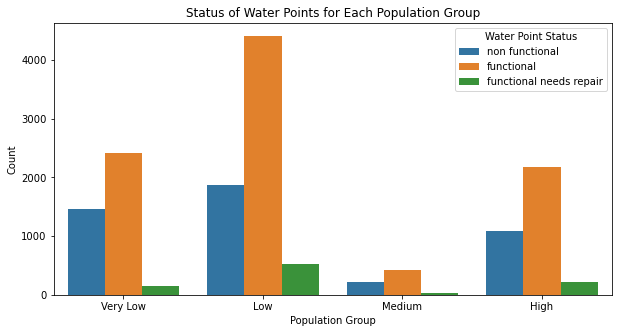

In [80]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='population_group', hue='status_group')
plt.title('Status of Water Points for Each Population Group')
plt.xlabel('Population Group')
plt.ylabel('Count')
plt.legend(title='Water Point Status')
plt.show()

Combine "functional" and "functional needs repair" into one group

population_group  status_group  
Very Low          functional        63.577800
                  non functional    36.422200
Low               functional        72.570671
                  non functional    27.429329
Medium            functional        68.529412
                  non functional    31.470588
High              functional        68.732071
                  non functional    31.267929
Name: status_group, dtype: float64


/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/975578999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status_group'] = df['status_group'].replace('functional needs repair', 'functional')


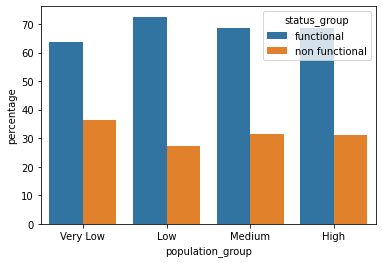

In [81]:
# Combine 'functional needs repair' into 'functional'
df['status_group'] = df['status_group'].replace('functional needs repair', 'functional')

# Calculate the percentages in each population group
status_percentages = df.groupby('population_group')['status_group'].value_counts(normalize=True) * 100

print(status_percentages)
# sns.histplot(data=df, x='population_group', hue='status_group', multiple='dodge', stat='percent')
# plt.show()


status_percentages = status_percentages.reset_index(name='percentage')

# barplot 
sns.barplot(data=status_percentages, x='population_group', y='percentage', hue='status_group')

plt.show()


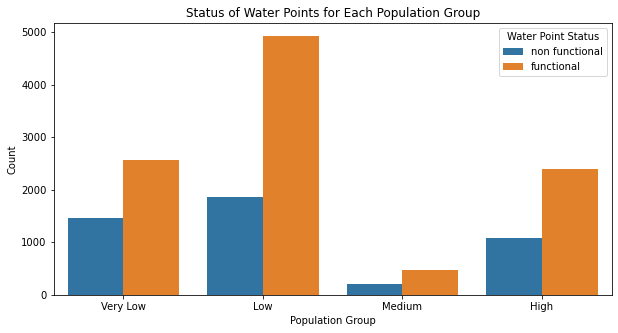

In [82]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='population_group', hue='status_group')
plt.title('Status of Water Points for Each Population Group')
plt.xlabel('Population Group')
plt.ylabel('Count')
plt.legend(title='Water Point Status')
plt.show()

In [83]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # number of population groups
# n_population_groups = df['population_group'].nunique()

# fig, axes = plt.subplots(n_population_groups, 1, figsize=(10, 6*n_population_groups))

# # For each subplot, filter the data for the respective population group and plot a box plot
# for ax, (population_group, group_df) in zip(axes, df.groupby('population_group')):
#     sns.boxplot(ax=ax, data=group_df, x='status_group', y='population')
#     ax.set_title(f'Population vs Status for {population_group} Population Group')
    

# plt.tight_layout()
# plt.show()



### convert the categorical values into numeric ones

state:

In [84]:
state_map = {'functional': 1, 'non functional': 0 }
df['status_group_num'] = df['status_group'].replace(state_map)
df['status_group_num'].unique()

/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/3174018867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status_group_num'] = df['status_group'].replace(state_map)


array([0, 1])

population:

In [85]:
population_map = {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4}
df['population_group_num'] = df['population_group'].replace(population_map)
df

/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/3610601679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['population_group_num'] = df['population_group'].replace(population_map)


,date_recorded,funder,gps_height,installer,basin,subvillage,region,region_code,population,public_meeting,...,management,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,population_group,status_group_num,population_group_num
id,,,,,,,,,,,,,,,,,,,,,
19816,2012-10-01,Dwsp,0,DWSP,Internal,Ishinabulandi,Shinyanga,18,265.769231,True,...,vwc,never pay,good,enough,groundwater,hand pump,non functional,Low,0,2
54551,2012-10-09,Rwssp,0,DWE,Lake Tanganyika,Nyawishi Center,Shinyanga,18,265.769231,True,...,wug,unknown,milky,enough,groundwater,hand pump,non functional,Low,0,2
53934,2012-11-03,Wateraid,0,Water Aid,Lake Tanganyika,Imalauduki,Tabora,20,265.769231,True,...,vwc,never pay,salty,seasonal,groundwater,hand pump,non functional,Low,0,2
46144,2011-08-03,Isingiro Ho,0,Artisan,Lake Victoria,Mkonomre,Kagera,5,265.769231,True,...,vwc,never pay,good,enough,groundwater,hand pump,functional,Low,1,2
50409,2013-02-18,Danida,1062,DANIDA,Lake Nyasa,Ngondombwito,Ruvuma,17,250.000000,True,...,wug,on failure,good,insufficient,groundwater,hand pump,functional,Very Low,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34952,2011-08-22,Adb,1786,DWE,Lake Rukwa,Nduza,Rukwa,16,1000.000000,True,...,vwc,never pay,good,enough,groundwater,hand pump,functional,High,1,4
30410,2011-08-06,Co,783,DWE,Lake Tanganyika,Itete B,Rukwa,16,1500.000000,False,...,vwc,never pay,good,enough,groundwater,hand pump,functional,High,1,4
13677,2011-08-04,Rudep,1715,DWE,Lake Tanganyika,Kitonto,Rukwa,16,150.000000,True,...,vwc,never pay,good,insufficient,groundwater,hand pump,functional,Very Low,1,1


In [86]:
df['population_group_num'].unique()

[2, 1, 4, 3]
Categories (4, int64): [1 < 2 < 3 < 4]

# 3. Exploratory Data Analysis (EDA)

In [87]:
df['permit'].unique()

array([True, False], dtype=object)

In [88]:
permit_map = {'True': 1, 'False': 0}
df['permit'] = df['permit'].replace(permit_map)
df['permit'].unique()

/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/3356749097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['permit'] = df['permit'].replace(permit_map)


array([ True, False])

In [89]:
print(df['public_meeting'].unique())
mapping = {'True': 1, 'False': 0}
df['public_meeting'] = df['public_meeting'].replace(mapping)
df['public_meeting'].unique()

[True False]


/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/1802739421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['public_meeting'] = df['public_meeting'].replace(mapping)


array([ True, False])

In [90]:
df.dtypes

date_recorded              object
funder                     object
gps_height                  int64
installer                  object
basin                      object
subvillage                 object
region                     object
region_code                 int64
population                float64
public_meeting               bool
permit                       bool
construction_year           int64
extraction_type_class      object
management                 object
payment_type               object
quality_group              object
quantity_group             object
source_class               object
waterpoint_type_group      object
status_group               object
population_group         category
status_group_num            int64
population_group_num     category
dtype: object

In [91]:
df['population_group_num'] = df['population_group_num'].astype('int64')


/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/1339594908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['population_group_num'] = df['population_group_num'].astype('int64')


In [92]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()


df['funder_num'] = encoder.fit_transform(df[['funder']])
df['installer_num'] = encoder.fit_transform(df[['installer']])
df['basin_num'] = encoder.fit_transform(df[['basin']])
df['subvillage_num'] = encoder.fit_transform(df[['subvillage']])
df['management_num'] = encoder.fit_transform(df[['management']])
df['payment_type_num'] = encoder.fit_transform(df[['payment_type']])
df['quality_group_num'] = encoder.fit_transform(df[['quality_group']])
df['source_class_num'] = encoder.fit_transform(df[['source_class']])
df['waterpoint_type_group_num'] = encoder.fit_transform(df[['waterpoint_type_group']])

/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/2313590039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['funder_num'] = encoder.fit_transform(df[['funder']])
/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/2313590039.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['installer_num'] = encoder.fit_transform(df[['installer']])
/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/2313590039.py:8: SettingWithCopyWarning: 
A value is trying to be set o

In [93]:
df['funder'] = df['funder'].astype('object')
df['installer'] = df['installer'].astype('object')
df['basin'] = df['basin'].astype('object')
#print(df['basin'].unique())
df['subvillage'] = df['subvillage'].astype('object')
df['management'] = df['management'].astype('object')
df['payment_type'] = df['payment_type'].astype('object')
df['quality_group'] = df['quality_group'].astype('object')
df['source_class'] = df['source_class'].astype('object')
df['waterpoint_type_group'] = df['waterpoint_type_group'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14994 entries, 19816 to 26348
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   date_recorded              14994 non-null  object  
 1   funder                     14994 non-null  object  
 2   gps_height                 14994 non-null  int64   
 3   installer                  14994 non-null  object  
 4   basin                      14994 non-null  object  
 5   subvillage                 14994 non-null  object  
 6   region                     14994 non-null  object  
 7   region_code                14994 non-null  int64   
 8   population                 14994 non-null  float64 
 9   public_meeting             14994 non-null  bool    
 10  permit                     14994 non-null  bool    
 11  construction_year          14994 non-null  int64   
 12  extraction_type_class      14994 non-null  object  
 13  management                 

/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/2863721794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['funder'] = df['funder'].astype('object')
/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/2863721794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['installer'] = df['installer'].astype('object')
/var/folders/k_/xqvg6q2d2vl0dgl9t056w0nh0000gn/T/ipykernel_86004/2863721794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

## Correlation

we are finding the suitable variables to predict the status. In our dataset, status_group_combined_num is the target variable

In [94]:
df.corr()

,gps_height,region_code,population,public_meeting,permit,construction_year,status_group_num,population_group_num,funder_num,installer_num,basin_num,subvillage_num,management_num,payment_type_num,quality_group_num,source_class_num,waterpoint_type_group_num
gps_height,1.000000,-0.240013,0.078882,0.020313,-0.012438,0.629730,-0.004784,0.071790,-0.012899,0.084592,-0.030337,-0.012303,-0.123439,-0.093642,-0.065358,-0.002127,0.004764
region_code,-0.240013,1.000000,-0.015861,-0.038755,-0.077910,-0.109137,0.051095,-0.004063,0.258749,0.069806,-0.258143,0.044298,0.292473,0.033360,0.083239,-0.014440,0.045648
population,0.078882,-0.015861,1.000000,0.002483,-0.017315,0.121950,0.030449,0.533678,-0.011804,-0.034579,0.014809,0.014395,-0.074294,0.049153,0.039021,-0.002839,-0.001656
public_meeting,0.020313,-0.038755,0.002483,1.000000,0.195887,0.068968,0.058411,0.034193,-0.005965,0.001409,0.095939,-0.013043,0.127823,-0.045390,-0.009356,-0.023401,0.011057
permit,-0.012438,-0.077910,-0.017315,0.195887,1.000000,-0.006326,0.035628,0.000792,-0.012109,0.073777,0.064382,-0.068380,-0.161432,-0.070414,-0.011836,0.017468,0.049963
construction_year,0.629730,-0.109137,0.121950,0.068968,-0.006326,1.000000,-0.073146,0.092413,-0.091225,-0.003201,0.417114,0.031752,-0.246821,-0.087006,0.074104,0.025909,0.034124
status_group_num,-0.004784,0.051095,0.030449,0.058411,0.035628,-0.073146,1.000000,0.025738,0.057618,0.044664,-0.070596,0.002421,0.131720,-0.040889,-0.074937,-0.035705,-0.025931
population_group_num,0.071790,-0.004063,0.533678,0.034193,0.000792,0.092413,0.025738,1.000000,0.005720,-0.026848,-0.028051,0.001652,-0.019349,0.040428,0.025578,-0.004682,-0.010815
funder_num,-0.012899,0.258749,-0.011804,-0.005965,-0.012109,-0.091225,0.057618,0.005720,1.000000,0.526593,-0.183337,0.017981,0.128692,0.119728,-0.003094,0.024150,-0.003860
installer_num,0.084592,0.069806,-0.034579,0.001409,0.073777,-0.003201,0.044664,-0.026848,0.526593,1.000000,-0.134722,0.020419,0.008776,0.060726,-0.023421,0.010397,-0.001449


Calculate the Pearson Correlation Coefficient and P-value of each numeric variable with state. Find a list of meaningful numeric parameters for predicting car price.

When two variables are correlated, there may or may not be a causative connection, and this connection may moreover be indirect. 

1: Perfect positive linear correlation.

0: No linear correlation, the two variables most likely do not affect each other.

-1: Perfect negative linear correlation.

p-value is < 0.001: we say there is strong evidence that the correlation is significant.

p-value is < 0.05: there is moderate evidence that the correlation is significant.

p-value is < 0.1: there is weak evidence that the correlation is significant.

p-value is > 0.1: there is no evidence that the correlation is significant.

### Regplot

gps_height : The Pearson Correlation Coefficient is -0.004784396935181759  with a P-value of P = 0.558007325422329
subvillage_num : The Pearson Correlation Coefficient is 0.0024206449739468546  with a P-value of P = 0.7669370910193232
region_code : The Pearson Correlation Coefficient is 0.05109459821389274  with a P-value of P = 3.847299273940714e-10
public_meeting : The Pearson Correlation Coefficient is 0.05841147620766508  with a P-value of P = 8.186250699278295e-13
permit : The Pearson Correlation Coefficient is 0.03562760399256259  with a P-value of P = 1.279269714430201e-05
construction_year : The Pearson Correlation Coefficient is -0.07314584177834316  with a P-value of P = 3.020153835767164e-19
population : The Pearson Correlation Coefficient is 0.030449337125931723  with a P-value of P = 0.00019218412014479554
population_group_num : The Pearson Correlation Coefficient is 0.025737932246683207  with a P-value of P = 0.001622291061826882
funder_num : The Pearson Correlation Coeff

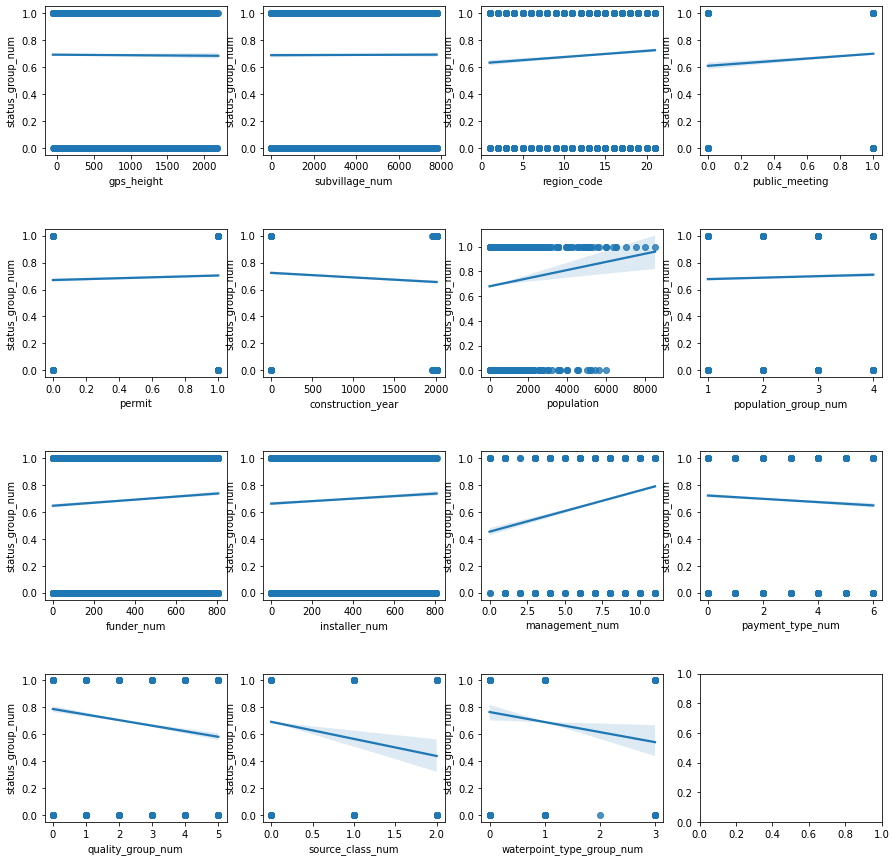

In [95]:
# from scipy import stats
# NumericalParameters = ["gps_height", 'subvillage_num',
#                        "region_code","public_meeting","permit",
#                        "construction_year","population",'population_group_num',
#                         'funder_num','installer_num','management_num',
#                        'payment_type_num','quality_group_num',
#                        'source_class_num','waterpoint_type_group_num']
# for column in NumericalParameters:
# #     if df[column].dtype == 'bool':
# #         data = df.groupby(column)['status_group_combined_num'].mean().reset_index()
# #         # bar plot
# #         plt.figure(figsize=(10,5))
# #         sns.barplot(x=column, y='status_group_combined_num', data=data)
# #         plt.show()
# #     else:
#     pearsoncoef, pvalue = stats.pearsonr(df[column], df['status_group_num'])
#     print(column,": The Pearson Correlation Coefficient is", pearsoncoef, " with a P-value of P =", pvalue)  

#     # regplot
#     plt.figure(figsize=(6,3))
#     sns.regplot(x=column, y='status_group_num', data=df)
#     plt.show()
#     print("\n")

import matplotlib.pyplot as plt
from scipy import stats

import math

import seaborn as sns

NumericalParameters = ["gps_height", 'subvillage_num',
                       "region_code","public_meeting","permit",
                       "construction_year","population",'population_group_num',
                        'funder_num','installer_num','management_num',
                       'payment_type_num','quality_group_num',
                       'source_class_num','waterpoint_type_group_num']

grid_size = math.ceil(math.sqrt(len(NumericalParameters)))

fig, axs = plt.subplots(grid_size, grid_size, figsize=(15,15))
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()

for i, column in enumerate(NumericalParameters):
    pearsoncoef, pvalue = stats.pearsonr(df[column], df['status_group_num'])
    print(column,": The Pearson Correlation Coefficient is", pearsoncoef, " with a P-value of P =", pvalue)  

    # regplot
    sns.regplot(x=column, y='status_group_num', data=df, ax=axs[i])

plt.show()

In [96]:
from scipy import stats
NumericalParameters = ["gps_height", 'subvillage_num',
                       "region_code","public_meeting","permit",
                       "construction_year","population","population_group_num",
                        'funder_num','installer_num','management_num',
                       'payment_type_num','quality_group_num',
                       'source_class_num','waterpoint_type_group_num']
for column in NumericalParameters:
#     if df[column].dtype == 'bool':
#         data = df.groupby(column)['status_group_combined_num'].mean().reset_index()
#         # bar plot
#         plt.figure(figsize=(10,5))
#         sns.barplot(x=column, y='status_group_combined_num', data=data)
#         plt.show()
#     else:
    pearsoncoef, pvalue = stats.pearsonr(df[column], df['status_group_num'])
    print(column,": The Pearson Correlation Coefficient is", pearsoncoef, " with a P-value of P =", pvalue)  
    print("\n")

gps_height : The Pearson Correlation Coefficient is -0.004784396935181759  with a P-value of P = 0.558007325422329


subvillage_num : The Pearson Correlation Coefficient is 0.0024206449739468546  with a P-value of P = 0.7669370910193232


region_code : The Pearson Correlation Coefficient is 0.05109459821389274  with a P-value of P = 3.847299273940714e-10


public_meeting : The Pearson Correlation Coefficient is 0.05841147620766508  with a P-value of P = 8.186250699278295e-13


permit : The Pearson Correlation Coefficient is 0.03562760399256259  with a P-value of P = 1.279269714430201e-05


construction_year : The Pearson Correlation Coefficient is -0.07314584177834316  with a P-value of P = 3.020153835767164e-19


population : The Pearson Correlation Coefficient is 0.030449337125931723  with a P-value of P = 0.00019218412014479554


population_group_num : The Pearson Correlation Coefficient is 0.025737932246683207  with a P-value of P = 0.001622291061826882


funder_num : The Pearson C

Note: regplot doesn't work well on bool, but it is still feasible.

## Categorical Data
To visualise the categorical data, I can use boxplots. However, after trail, the categorical doesn't work well on this dataset, as the binary label is not an ideal case.

In [97]:
# df.info()


In [98]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # list of column names for which you want to create boxplots
# column_names = ["basin",'management',
#                     'payment_type','quality_group','quantity_group','source_class','waterpoint_type_group']

# for column in column_names:
#     plt.figure(figsize=(20,5))
#     sns.boxplot(x=column, y="status_group_num", data=df)
#     plt.show()


## Descriptive Statistical Analysis

statistical summary of the every column - use df.describe()

statistical summary of object type

In [99]:
df.describe(include=['object'])

,date_recorded,funder,installer,basin,subvillage,region,extraction_type_class,management,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
count,14994,14994,14994,14994,14994,14994,14994,14994,14994,14994,14994,14994,14994,14994
unique,287,806,807,9,7776,21,2,12,7,6,5,3,4,2
top,2013-01-30,Government Of Tanzania,DWE,Lake Victoria,Shuleni,Shinyanga,handpump,vwc,never pay,good,enough,groundwater,hand pump,functional
freq,171,1048,5274,4184,126,2813,14716,10592,7653,11888,8765,14818,14804,10357


In [100]:
df.describe()

,gps_height,region_code,population,construction_year,status_group_num,population_group_num,funder_num,installer_num,basin_num,subvillage_num,management_num,payment_type_num,quality_group_num,source_class_num,waterpoint_type_group_num
count,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000
mean,412.395291,13.420568,337.624664,971.580165,0.690743,2.241163,397.121515,314.254568,3.992130,3874.343404,7.770575,2.517407,2.349340,0.013539,1.000667
std,600.394182,5.120869,427.038482,999.641551,0.462203,1.089228,234.531632,222.229431,2.343523,2223.204508,1.991859,1.545028,0.839805,0.130223,0.160867
min,-55.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,250.000000,0.000000,0.000000,1.000000,222.000000,153.000000,3.000000,1962.250000,7.000000,2.000000,2.000000,0.000000,1.000000
50%,0.000000,14.000000,265.769231,0.000000,1.000000,2.000000,332.000000,200.000000,4.000000,3860.500000,7.000000,2.000000,2.000000,0.000000,1.000000
75%,771.000000,18.000000,300.000000,2002.000000,1.000000,3.000000,591.000000,517.000000,6.000000,5698.750000,7.000000,3.000000,2.000000,0.000000,1.000000
max,2190.000000,21.000000,8500.000000,2013.000000,1.000000,4.000000,805.000000,806.000000,8.000000,7775.000000,11.000000,6.000000,5.000000,2.000000,3.000000


"region_code","public_meeting","permit","construction_year","population",'funder_num','installer_num','management','payment_type','quality_group','source_class','waterpoint_type_group', they all show weak correlation.


**Continuous numerical variables:**<br>
population<br>
region_code<br>
public_meeting<br>
permit<br>
construction_year<br>

**Categorical variables:**<br>
management<br>
funder<br>
installer<br>
management<br>
payment_type<br>
quality_group<br>
source_class<br>
waterpoint_type_group<br>

This is how we come up with our research questions, and deem them to be valid.

# 4. Classification

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

attributes = ["region_code","public_meeting","permit",
                       "construction_year","population_group_num",
                        'funder_num','installer_num','management_num',
                       'payment_type_num','quality_group_num',
                       'source_class_num','waterpoint_type_group_num','status_group_num']
dataset = df[attributes]

# Split data into features and labels
X = dataset.drop('status_group_num', axis=1)
y = dataset['status_group_num']


# Create Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X, y)

# Get feature importances
feature_importance = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the dataframe in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the dataframe
print(feature_importance_df)

                      Feature  Importance
3           construction_year    0.192554
5                  funder_num    0.179497
6               installer_num    0.152972
8            payment_type_num    0.093053
0                 region_code    0.091658
9           quality_group_num    0.089256
4        population_group_num    0.068648
7              management_num    0.065718
2                      permit    0.023978
1              public_meeting    0.019591
11  waterpoint_type_group_num    0.016423
10           source_class_num    0.006653


In [102]:
df = df.reset_index(drop=True)
df

,date_recorded,funder,gps_height,installer,basin,subvillage,region,region_code,population,public_meeting,...,population_group_num,funder_num,installer_num,basin_num,subvillage_num,management_num,payment_type_num,quality_group_num,source_class_num,waterpoint_type_group_num
0,2012-10-01,Dwsp,0,DWSP,Internal,Ishinabulandi,Shinyanga,18,265.769231,True,...,2,179.0,164.0,0.0,1652.0,7.0,2.0,2.0,0.0,1.0
1,2012-10-09,Rwssp,0,DWE,Lake Tanganyika,Nyawishi Center,Shinyanga,18,265.769231,True,...,2,591.0,153.0,3.0,6658.0,11.0,6.0,3.0,0.0,1.0
2,2012-11-03,Wateraid,0,Water Aid,Lake Tanganyika,Imalauduki,Tabora,20,265.769231,True,...,2,790.0,766.0,3.0,1482.0,7.0,2.0,4.0,0.0,1.0
3,2011-08-03,Isingiro Ho,0,Artisan,Lake Victoria,Mkonomre,Kagera,5,265.769231,True,...,2,282.0,45.0,4.0,4501.0,7.0,2.0,2.0,0.0,1.0
4,2013-02-18,Danida,1062,DANIDA,Lake Nyasa,Ngondombwito,Ruvuma,17,250.000000,True,...,1,125.0,129.0,1.0,6062.0,11.0,3.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,2011-08-22,Adb,1786,DWE,Lake Rukwa,Nduza,Rukwa,16,1000.000000,True,...,4,9.0,153.0,2.0,5946.0,7.0,2.0,2.0,0.0,1.0
14990,2011-08-06,Co,783,DWE,Lake Tanganyika,Itete B,Rukwa,16,1500.000000,False,...,4,95.0,153.0,3.0,1728.0,7.0,2.0,2.0,0.0,1.0
14991,2011-08-04,Rudep,1715,DWE,Lake Tanganyika,Kitonto,Rukwa,16,150.000000,True,...,1,580.0,153.0,3.0,2859.0,7.0,2.0,2.0,0.0,1.0
14992,2011-03-08,Malec,0,Musa,Rufiji,Mwinyi,Dodoma,3,125.500000,True,...,1,391.0,459.0,6.0,5654.0,7.0,2.0,2.0,0.0,1.0


Accuracy scores: [0.73424475 0.7159053  0.72624208 0.71857286 0.71547698]
Mean accuracy: 0.722


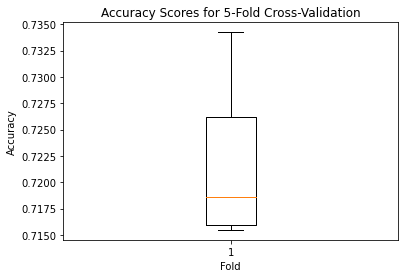

Accuracy for fold 1: 0.7342447482494164
Precision for fold 1: 0.7201689435524878
Recall for fold 1: 0.7342447482494164
Confusion matrix for fold 1:
[[ 414  514]
 [ 283 1788]]


Accuracy for fold 2: 0.7159053017672558
Precision for fold 2: 0.6963336779799874
Recall for fold 2: 0.7159053017672558
Confusion matrix for fold 2:
[[ 353  575]
 [ 277 1794]]


Accuracy for fold 3: 0.7262420806935646
Precision for fold 3: 0.7096660690122626
Recall for fold 3: 0.7262420806935646
Confusion matrix for fold 3:
[[ 384  543]
 [ 278 1794]]


Accuracy for fold 4: 0.7185728576192064
Precision for fold 4: 0.7006565992773458
Recall for fold 4: 0.7185728576192064
Confusion matrix for fold 4:
[[ 370  557]
 [ 287 1785]]


Accuracy for fold 5: 0.7154769846564376
Precision for fold 5: 0.6978903756641921
Recall for fold 5: 0.7154769846564376
Confusion matrix for fold 5:
[[ 373  554]
 [ 299 1772]]


Mean percentage of functional water points in each population group over all folds:
{'Very Low': 0.7018984852566179

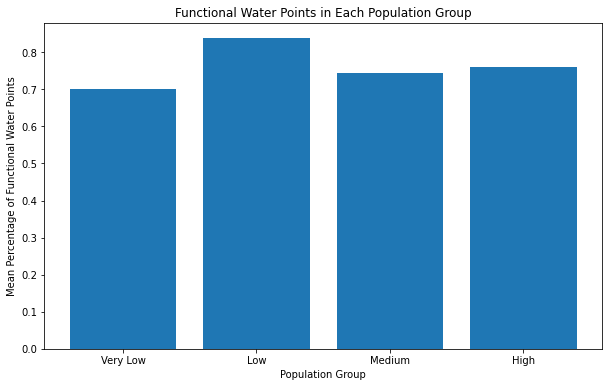

In [103]:
from sklearn.datasets import load_digits
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

attributes = ["region_code","public_meeting","permit",
              "construction_year","population_group_num",
              'funder_num','installer_num','management_num',
              'payment_type_num','quality_group_num',
              'source_class_num','waterpoint_type_group_num','status_group_num']

# attributes = ["construction_year","population_group_num",
#               'funder_num','installer_num',
#               'payment_type_num','status_group_num']


dataset = df[attributes]
# Assuming df is your DataFrame


# Split into features and labels
X = dataset.drop('status_group_num', axis=1)
Y = dataset['status_group_num']

# Create a model with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, Y, cv=skf)
print(f"Accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")

# Plot the accuracy scores for each fold
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores for 5-Fold Cross-Validation')
plt.show()

train_scores_acc =[]
train_scores_prec = []
train_scores_rec = []


GROUPS = {1: 'Very Low', 2: 'Low', 3: 'Medium', 4: 'High'}
# Initialize the result dictionary to store percentages
result = {group_name: [] for group_name in GROUPS.values()}

# Create confusion matrices for each fold
for i, (train_index, test_index) in enumerate(skf.split(X, Y)):
    # Get the training and testing data for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Fit the model 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')

    train_scores_acc.append(acc)
    train_scores_prec.append(prec)
    train_scores_rec.append(rec)

    # Print accuracy, precision, and recall for this fold
    print(f"Accuracy for fold {i+1}: {acc}")
    print(f"Precision for fold {i+1}: {prec}")
    print(f"Recall for fold {i+1}: {rec}")

    # Create the confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for fold {i+1}:")
    print(cm)
    print('\n')
    
    
    
    # Loop
    for key, bin_name in GROUPS.items():
        # Extract the indices in the test set
        indices = X_test[X_test['population_group_num'] == key].index
        #the relative positions of high population indices within the X_test
        relative_indices = np.where(X_test.index.isin(indices))[0]
        
        # Get predictions for this population bin
        y_pred_bin = y_pred[relative_indices]
        
        # Calculate the percentage of functional water points in this population group
        functional_percentage = (y_pred_bin == 1).mean()
        
        # Append the percentage to the result list for this population group
        result[bin_name].append(functional_percentage)


#     #high population
#     high_population_indices = X_test[X_test['population_group_num'] == 4].index
#     #the relative positions of high population indices within the X_test
#     relative_indices = np.where(X_test.index.isin(high_population_indices))[0]
    
#     # Gpredictions for high population
#     y_pred_high_population = y_pred[relative_indices]
#     # Convert to a pandas series
#     y_pred_high_population = pd.Series(y_pred_high_population)
    
#     # how many of each unique value there are
#     value_counts = y_pred_high_population.value_counts()
#     # Calculate the proportions by dividing by the total count
#     percentages = value_counts / value_counts.sum()
#     #percentages = y_pred_high_population.value_counts(normalize=True)
#     print("In high population:")
#     print(percentages)
    
#     #low population
#     low_population_indices = X_test[X_test['population_group_num'] == 2].index
#     relative_indices = np.where(X_test.index.isin(low_population_indices))[0]
    
#     y_pred_low_population = y_pred[relative_indices]
#     y_pred_low_population = pd.Series(y_pred_low_population)
    
#     value_counts = y_pred_low_population.value_counts()
#     percentages = value_counts / value_counts.sum()

#     print("In low population:")
#     print(percentages)
    
#     #very low population
#     very_low_population_indices = X_test[X_test['population_group_num'] == 1].index
#     relative_indices = np.where(X_test.index.isin(very_low_population_indices))[0]
    
#     y_pred_very_low_population = y_pred[relative_indices]
#     y_pred_very_low_population = pd.Series(y_pred_very_low_population)
    
#     value_counts = y_pred_very_low_population.value_counts()
#     percentages = value_counts / value_counts.sum()

#     print("In very low population:")
#     print(percentages)
    
#     #medium population
#     medium_population_indices = X_test[X_test['population_group_num'] == 3].index
#     relative_indices = np.where(X_test.index.isin(medium_population_indices))[0]
    
#     y_pred_medium_population = y_pred[relative_indices]
#     y_pred_medium_population = pd.Series(y_pred_medium_population)
    
#     value_counts = y_pred_medium_population.value_counts()
#     percentages = value_counts / value_counts.sum()

#     print("In medium population:")
#     print(percentages)


# Calculate the mean percentage for each population group over all folds
mean_result = {group_name: np.mean(percentages) for group_name, percentages in result.items()}

print("Mean percentage of functional water points in each population group over all folds:")
print(mean_result)
# Print mean accuracy, precision, and recall over all folds
print(f"Mean accuracy over all folds: {np.mean(train_scores_acc)}")
print(f"Mean precision over all folds: {np.mean(train_scores_prec)}")
print(f"Mean recall over all folds: {np.mean(train_scores_rec)}")

# Plot percentage of functional water points for each population
plt.figure(figsize=(10, 6))
population_groups = list(mean_result.keys())
functional_percentages = list(mean_result.values())
plt.bar(population_groups, functional_percentages)
plt.xlabel('Population Group')
plt.ylabel('Mean Percentage of Functional Water Points')
plt.title('Functional Water Points in Each Population Group')
plt.show()

Note: SVM takes around 3 mins to run

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# attributes = ["region_code","public_meeting","permit",
#               "construction_year","population_group_num",
#               'funder_num','installer_num','management_num',
#               'payment_type_num','quality_group_num',
#               'source_class_num','waterpoint_type_group_num','status_group_num']

#choose the top 4 features with population that we interest in
attributes = ["construction_year","population_group_num",
              'funder_num','installer_num',
              'payment_type_num','status_group_num']


dataset = df[attributes]
# Assuming df is your DataFrame


# Split into features and labels
X = dataset.drop('status_group_num', axis=1)
Y = dataset['status_group_num']
# Train SVM models with different kernels
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
GROUPS = {1: 'Very Low', 2: 'Low', 3: 'Medium', 4: 'High'}

kernels = ['linear', 'poly', 'sigmoid', 'rbf']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Predict the labels for the testing set
    y_pred = clf.predict(X_test)

    # Calculate the precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = clf.score(X_test, y_test)

    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}\n")
   
    for key, bin_name in GROUPS.items():
        # Extract the indices in the test set
        indices = X_test[X_test['population_group_num'] == key].index
        #the relative positions of high population indices within the X_test
        relative_indices = np.where(X_test.index.isin(indices))[0]

        # Get predictions for this population bin
        y_pred_bin = y_pred[relative_indices]

        # Calculate the percentage of functional water points in this population group
        functional_percentage = (y_pred_bin == 1).mean()


        print(f"Kernel: {kernel}, Population Group: {bin_name}, Functional Percentage: {functional_percentage:.3f}\n")

Kernel: linear
Accuracy: 0.693
Precision: 0.693
Recall: 1.000

Kernel: linear, Population Group: Very Low, Functional Percentage: 1.000

Kernel: linear, Population Group: Low, Functional Percentage: 1.000

Kernel: linear, Population Group: Medium, Functional Percentage: 1.000

Kernel: linear, Population Group: High, Functional Percentage: 1.000

Kernel: poly
Accuracy: 0.693
Precision: 0.693
Recall: 1.000

Kernel: poly, Population Group: Very Low, Functional Percentage: 1.000

Kernel: poly, Population Group: Low, Functional Percentage: 1.000

Kernel: poly, Population Group: Medium, Functional Percentage: 1.000

Kernel: poly, Population Group: High, Functional Percentage: 1.000

Kernel: sigmoid
Accuracy: 0.575
Precision: 0.688
Recall: 0.709

Kernel: sigmoid, Population Group: Very Low, Functional Percentage: 0.713

Kernel: sigmoid, Population Group: Low, Functional Percentage: 0.742

Kernel: sigmoid, Population Group: Medium, Functional Percentage: 0.696

Kernel: sigmoid, Population Grou

# Q2:

Can we predict whether locally managed water points are more likely to fail than state managed ones? 

@AUTHOR: Kangle Yuan 20178699 psyky2@nottingham.ac.uk

In [105]:
df2.shape

(51670, 20)

In [106]:
df2.dropna()

,date_recorded,funder,gps_height,installer,basin,subvillage,region,region_code,population,public_meeting,permit,construction_year,extraction_type_class,management,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,
69572,2011-03-14,Roman,1390,Roman,Lake Nyasa,Mnyusi B,Iringa,4,109,True,False,1999,gravity,vwc,annually,good,enough,groundwater,communal standpipe,functional
34310,2013-02-25,Lottery Club,686,World vision,Pangani,Majengo,Manyara,9,250,True,True,2009,gravity,vwc,per bucket,good,enough,surface,communal standpipe,functional
67743,2013-01-28,Unicef,263,UNICEF,Ruvuma / Southern Coast,Mahakamani,Mtwara,13,58,True,True,1986,submersible,vwc,never pay,good,dry,groundwater,communal standpipe,non functional
19728,2011-07-13,Action In A,0,Artisan,Lake Victoria,Kyanyamisa,Kagera,5,0,True,True,0,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional
9944,2011-03-13,Mkinga Distric Coun,0,DWE,Pangani,Moa/Mwereme,Tanga,21,1,True,True,2009,submersible,vwc,per bucket,salty,enough,unknown,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,2011-03-09,World Bank,351,ML appro,Wami / Ruvu,Komstari,Morogoro,12,89,True,True,2007,submersible,vwc,monthly,good,enough,groundwater,communal standpipe,non functional
60739,2013-05-03,Germany Republi,1210,CES,Pangani,Kiduruni,Kilimanjaro,7,125,True,True,1999,gravity,water board,per bucket,good,enough,groundwater,communal standpipe,functional
27263,2011-05-07,Cefa-njombe,1212,Cefa,Rufiji,Igumbilo,Iringa,4,56,True,True,1996,gravity,vwc,annually,good,enough,surface,communal standpipe,functional


## pre-processing

In [107]:
# percentage of 0s in every column
percentage_of_zeros = (df2 == 0).mean() * 100
print(percentage_of_zeros)

date_recorded             0.000000
funder                    0.000000
gps_height               32.862396
installer                 0.000000
basin                     0.000000
subvillage                0.000000
region                    0.000000
region_code               0.000000
population               34.683569
public_meeting            8.796207
permit                   29.694213
construction_year        32.968841
extraction_type_class     0.000000
management                0.000000
payment_type              0.000000
quality_group             0.000000
quantity_group            0.000000
source_class              0.000000
waterpoint_type_group     0.000000
status_group              0.000000
dtype: float64


In [108]:
# mean for each subvillage, excluding 0
mean_population = df2[df2['population']>0].groupby('subvillage')['population'].mean()

# replace all 0s and nah in population by the mean of the resppective subvillage
df2.loc[df2['population'] <= 0, 'population'] = df2['subvillage'].map(mean_population)
df2['population'].fillna(df2['subvillage'].map(mean_population), inplace=True)

# any subvillages where all population values were 0, replace by overall median population
df2['population'].fillna(df2['population'].median(), inplace=True)
# percentage of 0s in every column
percentage_of_zeros = (df2 == 0).mean() * 100
print(percentage_of_zeros)

date_recorded             0.000000
funder                    0.000000
gps_height               32.862396
installer                 0.000000
basin                     0.000000
subvillage                0.000000
region                    0.000000
region_code               0.000000
population                0.000000
public_meeting            8.796207
permit                   29.694213
construction_year        32.968841
extraction_type_class     0.000000
management                0.000000
payment_type              0.000000
quality_group             0.000000
quantity_group            0.000000
source_class              0.000000
waterpoint_type_group     0.000000
status_group              0.000000
dtype: float64


In [109]:
#treat 0s in gps_height as 0
#remove 0s in construction year
df2 = df2[~(df2[['construction_year', 'gps_height']] == 0).any(axis=1)]

# percentage of 0s in every column
percentage_of_zeros = (df2 == 0).mean() * 100
print(percentage_of_zeros)

#permit & public meeting are bool

date_recorded             0.000000
funder                    0.000000
gps_height                0.000000
installer                 0.000000
basin                     0.000000
subvillage                0.000000
region                    0.000000
region_code               0.000000
population                0.000000
public_meeting            7.993860
permit                   28.126107
construction_year         0.000000
extraction_type_class     0.000000
management                0.000000
payment_type              0.000000
quality_group             0.000000
quantity_group            0.000000
source_class              0.000000
waterpoint_type_group     0.000000
status_group              0.000000
dtype: float64


## Binning

In [110]:
# only interested in vwc, water authority and water board
df2 = df2[(df2['management'] == 'vwc') | (df2['management'] == 'water authority')| (df2['management'] == 'water board')]
df2.shape

(26741, 20)

management:

In [111]:
df2['management'].unique()

array(['vwc', 'water board', 'water authority'], dtype=object)

In [112]:
management_map = {'vwc': 'local', 'water authority': 'state', 'water board': 'state'}
# Create a new column 'management_level' by mapping the dictionary to the 'management' column
df2['management_level'] = df2['management'].map(management_map)

# If management_level is NaN (i.e., the original value in 'management' was not in management_map), 
# keep the original value from 'management'
df2['management_level'].fillna(df2['management'], inplace=True)

df2.shape

(26741, 21)

In [113]:
managemenr_map = {'local': 1, 'state': 2 }
df2['management_level_num'] = df2['management_level'].replace(managemenr_map)
df2['management_level_num'].unique()

array([1, 2])

management_level  status_group  
local             functional        59.786160
                  non functional    40.213840
state             functional        78.688525
                  non functional    21.311475
Name: status_group, dtype: float64


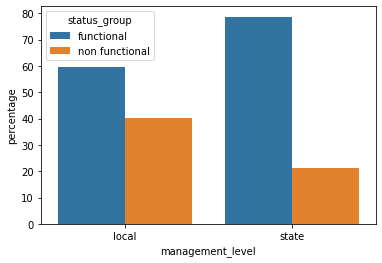

In [114]:
# Combine 'functional needs repair' into 'functional'
df2['status_group'] = df2['status_group'].replace('functional needs repair', 'functional')

# Calculate the percentages in each population group
status_percentages = df2.groupby('management_level')['status_group'].value_counts(normalize=True) * 100

print(status_percentages)

status_percentages = status_percentages.reset_index(name='percentage')

# barplot 
sns.barplot(data=status_percentages, x='management_level', y='percentage', hue='status_group')

plt.show()

In [115]:
state_map = {'functional': 0, 'non functional': 1 }
df2['status_group_num'] = df2['status_group'].replace(state_map)
df2['status_group_num'].unique()

array([0, 1])

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26741 entries, 69572 to 26348
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_recorded          26741 non-null  object 
 1   funder                 26741 non-null  object 
 2   gps_height             26741 non-null  int64  
 3   installer              26741 non-null  object 
 4   basin                  26741 non-null  object 
 5   subvillage             26741 non-null  object 
 6   region                 26741 non-null  object 
 7   region_code            26741 non-null  int64  
 8   population             26741 non-null  float64
 9   public_meeting         26741 non-null  object 
 10  permit                 26741 non-null  object 
 11  construction_year      26741 non-null  int64  
 12  extraction_type_class  26741 non-null  object 
 13  management             26741 non-null  object 
 14  payment_type           26741 non-null  object 
 15

In [117]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

df2['funder_num'] = encoder.fit_transform(df2[['funder']])
df2['installer_num'] = encoder.fit_transform(df2[['installer']])
df2['basin_num'] = encoder.fit_transform(df2[['basin']])
df2['subvillage_num'] = encoder.fit_transform(df2[['subvillage']])
df2['extraction_type_class_num'] = encoder.fit_transform(df2[['extraction_type_class']])
df2['payment_type_num'] = encoder.fit_transform(df2[['payment_type']])
df2['quality_group_num'] = encoder.fit_transform(df2[['quality_group']])
df2['source_class_num'] = encoder.fit_transform(df2[['source_class']])
df2['waterpoint_type_group_num'] = encoder.fit_transform(df2[['waterpoint_type_group']])

df2['funder'] = df2['funder'].astype('object')
df2['installer'] = df2['installer'].astype('object')
df2['basin'] = df2['basin'].astype('object')
df2['subvillage'] = df2['subvillage'].astype('object')
df2['management'] = df2['management'].astype('object')
df2['payment_type'] = df2['payment_type'].astype('object')
df2['quality_group'] = df2['quality_group'].astype('object')
df2['source_class'] = df2['source_class'].astype('object')
df2['waterpoint_type_group'] = df2['waterpoint_type_group'].astype('object')

df2['management_level_num'] = df2['management_level_num'].astype('int64')

df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26741 entries, 69572 to 26348
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_recorded              26741 non-null  object 
 1   funder                     26741 non-null  object 
 2   gps_height                 26741 non-null  int64  
 3   installer                  26741 non-null  object 
 4   basin                      26741 non-null  object 
 5   subvillage                 26741 non-null  object 
 6   region                     26741 non-null  object 
 7   region_code                26741 non-null  int64  
 8   population                 26741 non-null  float64
 9   public_meeting             26741 non-null  object 
 10  permit                     26741 non-null  object 
 11  construction_year          26741 non-null  int64  
 12  extraction_type_class      26741 non-null  object 
 13  management                 26741 non-null 

In [118]:
df2.corr()

,gps_height,region_code,population,construction_year,management_level_num,status_group_num,funder_num,installer_num,basin_num,subvillage_num,extraction_type_class_num,payment_type_num,quality_group_num,source_class_num,waterpoint_type_group_num
gps_height,1.000000,-0.433420,-0.062642,0.056965,0.120269,-0.216856,0.108610,0.044860,-0.591535,-0.053305,-0.359064,-0.116628,-0.222659,-0.000627,-0.233015
region_code,-0.433420,1.000000,0.060025,-0.142893,-0.159166,0.172480,0.078498,0.053451,0.148062,-0.013897,0.269453,-0.108404,0.129212,0.000423,0.190221
population,-0.062642,0.060025,1.000000,0.034888,-0.033469,0.000889,0.034880,0.017664,-0.052422,-0.007048,0.117110,0.054645,0.052830,0.041488,0.079468
construction_year,0.056965,-0.142893,0.034888,1.000000,0.087318,-0.262587,0.119781,0.053947,-0.075107,0.006420,-0.025885,0.075545,-0.021656,-0.069105,-0.071065
management_level_num,0.120269,-0.159166,-0.033469,0.087318,1.000000,-0.125936,-0.046854,-0.019529,-0.072020,0.010115,-0.097768,0.081149,-0.072237,0.035638,-0.154405
status_group_num,-0.216856,0.172480,0.000889,-0.262587,-0.125936,1.000000,-0.006693,0.014627,0.154499,0.009275,0.271857,0.068640,0.162875,-0.024496,0.280697
funder_num,0.108610,0.078498,0.034880,0.119781,-0.046854,-0.006693,1.000000,0.571246,-0.155660,-0.041424,0.012254,-0.049618,0.002033,0.010692,0.019145
installer_num,0.044860,0.053451,0.017664,0.053947,-0.019529,0.014627,0.571246,1.000000,-0.036582,-0.033158,0.090446,-0.017405,0.005861,0.027626,0.033503
basin_num,-0.591535,0.148062,-0.052422,-0.075107,-0.072020,0.154499,-0.155660,-0.036582,1.000000,0.057674,0.204938,0.053909,0.143514,-0.078079,0.148807
subvillage_num,-0.053305,-0.013897,-0.007048,0.006420,0.010115,0.009275,-0.041424,-0.033158,0.057674,1.000000,-0.002037,0.023308,0.005641,-0.005993,-0.002867


gps_height : The Pearson Correlation Coefficient is -0.2168562033287691  with a P-value of P = 4.701674401090814e-282
region_code : The Pearson Correlation Coefficient is 0.1724796611083438  with a P-value of P = 1.2492864258030197e-177
population : The Pearson Correlation Coefficient is 0.0008893687991714549  with a P-value of P = 0.8843723074824701
construction_year : The Pearson Correlation Coefficient is -0.2625869884740959  with a P-value of P = 0.0
management_level_num : The Pearson Correlation Coefficient is -0.12593626420976117  with a P-value of P = 5.775084479659489e-95
funder_num : The Pearson Correlation Coefficient is -0.006692700541092975  with a P-value of P = 0.2737810284531336
installer_num : The Pearson Correlation Coefficient is 0.014626700842903531  with a P-value of P = 0.016762638266434118
basin_num : The Pearson Correlation Coefficient is 0.15449930580674884  with a P-value of P = 1.6642940441744046e-142
subvillage_num : The Pearson Correlation Coefficient is 0.0

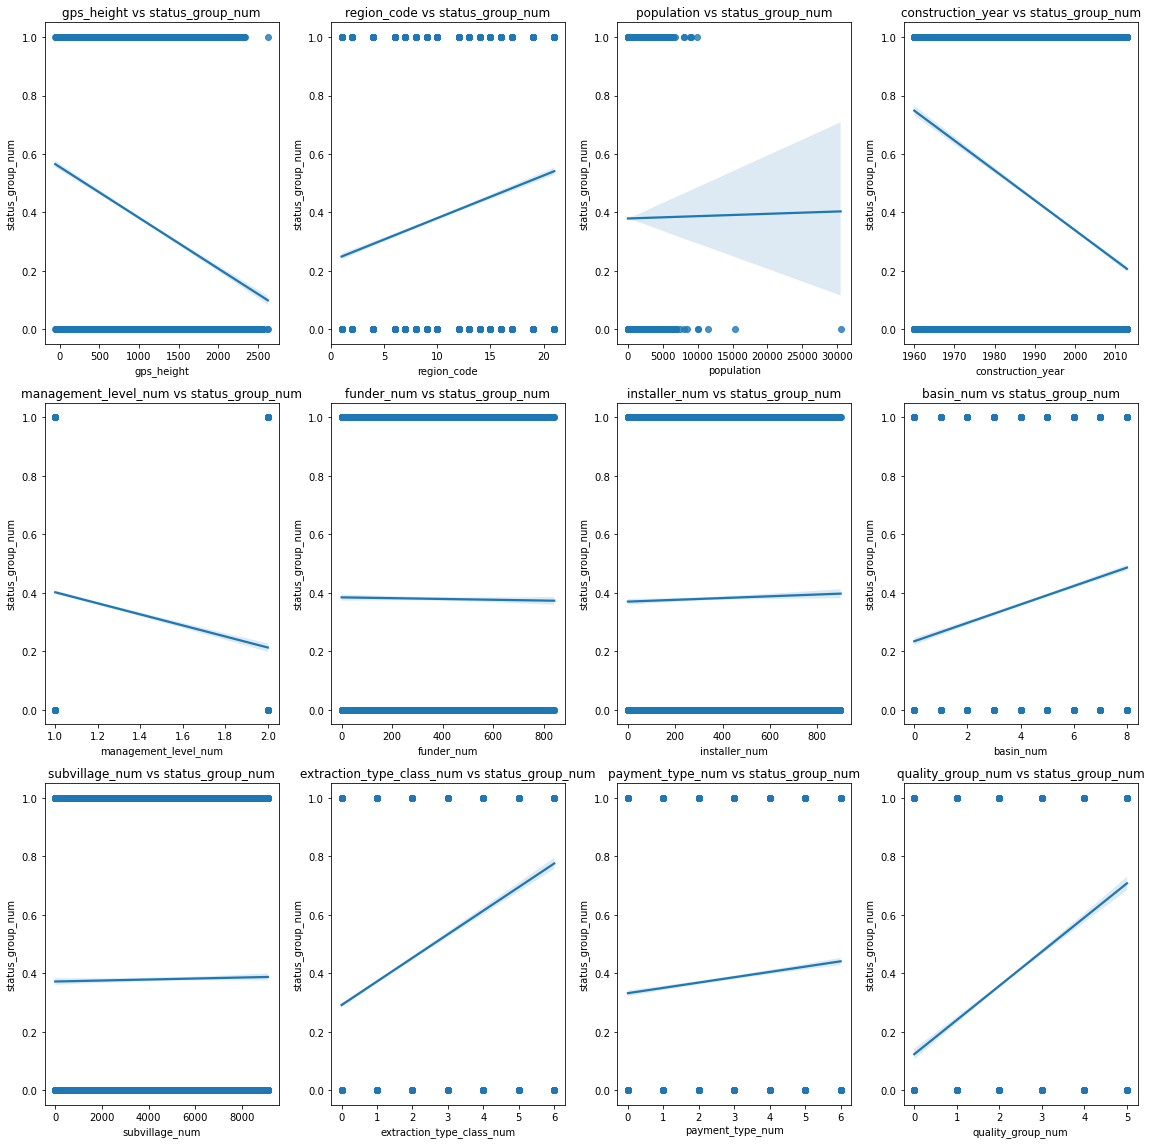

In [119]:
NumericalParameters = ['gps_height','region_code','population','construction_year','management_level_num','funder_num','installer_num','basin_num','subvillage_num','extraction_type_class_num',
                       'payment_type_num','quality_group_num','source_class_num','waterpoint_type_group_num']
# for column in NumericalParameters:
#     pearsoncoef, pvalue = stats.pearsonr(df2[column], df2['status_group_num'])
#     print(column,": The Pearson Correlation Coefficient is", pearsoncoef, " with a P-value of P =", pvalue)  
#     print("\n")
    
#grid of subplots with 4 columns
fig, axes = plt.subplots(len(NumericalParameters)//4, 4, figsize=(16, 16))

for ax, column in zip(axes.flatten(), NumericalParameters):
    pearsoncoef, pvalue = stats.pearsonr(df2[column], df2['status_group_num'])
    # Print
    print(column,": The Pearson Correlation Coefficient is", pearsoncoef, " with a P-value of P =", pvalue)  
 
    # Plot
    sns.regplot(x=column, y='status_group_num', data=df2, ax=ax)
    ax.set_title(f'{column} vs status_group_num')

# Adjust the layout of the plots
plt.tight_layout()
plt.show()

population,funder,subvillage are not siginificant coorelating with state

rest of them might be a good predictor: ['gps_height','region_code','construction_year','management_level_num','installer_num','basin_num','extraction_type_class_num','payment_type_num','quality_group_num','source_class_num','waterpoint_type_group_num']

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

attributes = ['status_group_num','gps_height','region_code','construction_year','management_level_num','installer_num','basin_num','extraction_type_class_num',
                       'payment_type_num','quality_group_num','source_class_num','waterpoint_type_group_num']
dataset = df2[attributes]

# Split data into features and labels
X = dataset.drop('status_group_num', axis=1)
y = dataset['status_group_num']


# Create Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X, y)

# Get feature importances
feature_importance = clf.feature_importances_

# Create a dataframe for easy viewing
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the dataframe
print(feature_importance_df)

                      Feature  Importance
0                  gps_height    0.366868
2           construction_year    0.167885
4               installer_num    0.090063
6   extraction_type_class_num    0.078891
10  waterpoint_type_group_num    0.077567
7            payment_type_num    0.077281
1                 region_code    0.057004
5                   basin_num    0.036716
8           quality_group_num    0.023988
9            source_class_num    0.015165
3        management_level_num    0.008571


Accuracy scores: [0.77191999 0.76495886 0.76533283 0.77580404 0.77112939]
Mean accuracy: 0.770


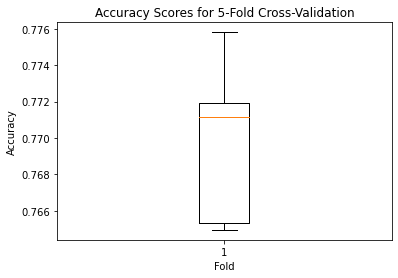

Accuracy for fold 1: 0.7719199850439334
Precision for fold 1: 0.7701082482473319
Recall for fold 1: 0.7719199850439334
Confusion matrix for fold 1:
[[2758  560]
 [ 660 1371]]


Accuracy for fold 2: 0.7649588631264024
Precision for fold 2: 0.7630202583775061
Recall for fold 2: 0.7649588631264024
Confusion matrix for fold 2:
[[2741  577]
 [ 680 1350]]


Accuracy for fold 3: 0.7653328347045625
Precision for fold 3: 0.7637510111218235
Recall for fold 3: 0.7653328347045625
Confusion matrix for fold 3:
[[2730  587]
 [ 668 1363]]


Accuracy for fold 4: 0.7758040388930442
Precision for fold 4: 0.7740792403283019
Recall for fold 4: 0.7758040388930442
Confusion matrix for fold 4:
[[2766  551]
 [ 648 1383]]


Accuracy for fold 5: 0.7711293941660434
Precision for fold 5: 0.7701644041949292
Recall for fold 5: 0.7711293941660434
Confusion matrix for fold 5:
[[2729  588]
 [ 636 1395]]


Mean percentage of functional water points in each management group over all folds:
{'local': 0.38745503141772664, 

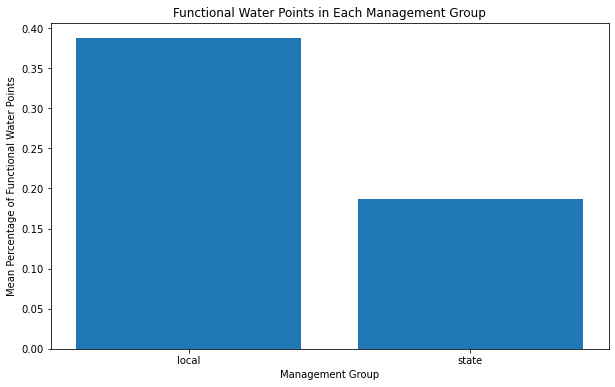

In [121]:
from sklearn.datasets import load_digits
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

#just keep the top 4 features + management

attributes = ["gps_height","construction_year","installer_num",
              "extraction_type_class_num","management_level_num",'status_group_num']

# attributes = ["construction_year","population_group_num",
#               'funder_num','installer_num',
#               'payment_type_num','status_group_num']


dataset = df2[attributes]

# Split into features and labels
X = dataset.drop('status_group_num', axis=1)
Y = dataset['status_group_num']

# Create a model with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, Y, cv=skf)
print(f"Accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")

# Plot the accuracy scores for each fold
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores for 5-Fold Cross-Validation')
plt.show()

train_scores_acc =[]
train_scores_prec = []
train_scores_rec = []


GROUPS = {1: 'local', 2: 'state'}
# Initialize the result dictionary to store percentages
result = {group_name: [] for group_name in GROUPS.values()}

# Create confusion matrices for each fold
for i, (train_index, test_index) in enumerate(skf.split(X, Y)):
    # Get the training and testing data for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Fit the model 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')

    train_scores_acc.append(acc)
    train_scores_prec.append(prec)
    train_scores_rec.append(rec)

    # Print accuracy, precision, and recall for this fold
    print(f"Accuracy for fold {i+1}: {acc}")
    print(f"Precision for fold {i+1}: {prec}")
    print(f"Recall for fold {i+1}: {rec}")

    # Create the confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for fold {i+1}:")
    print(cm)
    print('\n')
    
    # Loop
    for key, bin_name in GROUPS.items():
        # Extract the indices in the test set
        indices = X_test[X_test['management_level_num'] == key].index
        #the relative positions of high population indices within the X_test
        relative_indices = np.where(X_test.index.isin(indices))[0]
        
        # Get predictions for this population bin
        y_pred_bin = y_pred[relative_indices]
        
        # Calculate the percentage of functional water points in this management group
        functional_percentage = (y_pred_bin == 1).mean()
        
        # Append the percentage to the result list for this management group
        result[bin_name].append(functional_percentage)

# Calculate the mean percentage for each management group over all folds
mean_result = {group_name: np.mean(percentages) for group_name, percentages in result.items()}

print("Mean percentage of functional water points in each management group over all folds:")
print(mean_result)
# Print mean accuracy, precision, and recall over all folds
print(f"Mean accuracy over all folds: {np.mean(train_scores_acc)}")
print(f"Mean precision over all folds: {np.mean(train_scores_prec)}")
print(f"Mean recall over all folds: {np.mean(train_scores_rec)}")

# Plot percentage of functional water points for each management
plt.figure(figsize=(10, 6))
management_groups = list(mean_result.keys())
functional_percentages = list(mean_result.values())
plt.bar(management_groups, functional_percentages)
plt.xlabel('Management Group')
plt.ylabel('Mean Percentage of Functional Water Points')
plt.title('Functional Water Points in Each Management Group')
plt.show()


accuracy: 0.7176866508787236
precision: 0.715733143570969
recall: 0.7176866508787236
mean percentage of functional water points at 2 each management group over all k:
{'local': 0.24116482895108848, 'state': 0.1053740779768177}
accuracy: 0.718559142465412
precision: 0.7153844369198129
recall: 0.718559142465412
mean percentage of functional water points at 3 each management group over all k:
{'local': 0.3068278201865988, 'state': 0.14963119072708114}
accuracy: 0.7244173002617474
precision: 0.7202575656490242
recall: 0.7244173002617474
mean percentage of functional water points at 4 each management group over all k:
{'local': 0.2941758552445575, 'state': 0.13979627678257814}
accuracy: 0.7214259005359591
precision: 0.7164366533105679
recall: 0.7214259005359591
mean percentage of functional water points at 5 each management group over all k:
{'local': 0.3092663273960984, 'state': 0.14383561643835616}
accuracy: 0.7229216003988533
precision: 0.7180280213566153
recall: 0.7229216003988533
mean 

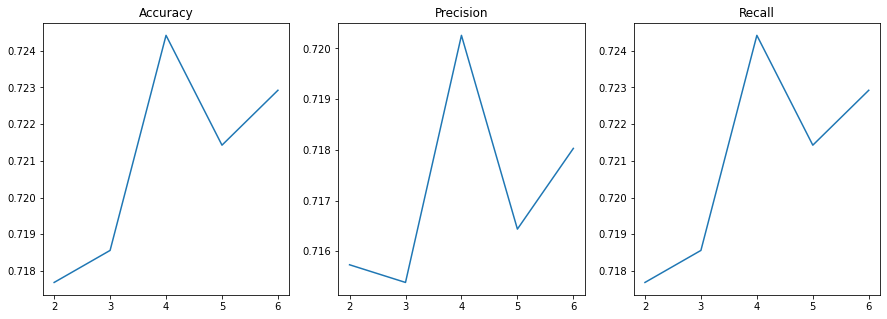

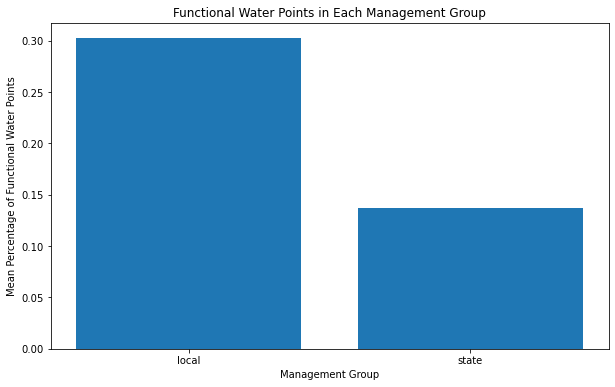

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

attributes = ["gps_height","construction_year","installer_num",
              "extraction_type_class_num","management_level_num",'status_group_num']

dataset = df2[attributes]

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define range of K values to try
k_values = range(2, 7)

# Split into features and labels
X = dataset.drop('status_group_num', axis=1)
Y = dataset['status_group_num']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize arrays to store evaluation metrics
accuracy = np.zeros(len(k_values))
precision = np.zeros(len(k_values))
recall = np.zeros(len(k_values))


GROUPS = {1: 'local', 2: 'state'}
# Initialize the result dictionary to store percentages
result = {group_name: [] for group_name in GROUPS.values()}

for i, k in enumerate(k_values):
    # Fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = knn.predict(X_test)
    
    # Compute evaluation metrics
    accuracy[i] = accuracy_score(y_test, y_pred)
    print(f'accuracy: {accuracy[i]}')
    precision[i] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall[i] = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    print(f'precision: {precision[i]}')
    print(f'recall: {recall[i]}')
    for key, bin_name in GROUPS.items():
        # Extract the indices in the test set
        indices = X_test[X_test['management_level_num'] == key].index
        #the relative positions of high population indices within the X_test
        relative_indices = np.where(X_test.index.isin(indices))[0]

        # Get predictions for this population bin
        y_pred_bin = y_pred[relative_indices]

        # Calculate the percentage of functional water points in this population group
        functional_percentage = (y_pred_bin == 1).mean()


        # Append the percentage to the result list for this management group
        result[bin_name].append(functional_percentage)

        # Calculate the mean percentage for each management group over all folds
    mean_result = {group_name: np.mean(percentages) for group_name, percentages in result.items()}

    print(f'mean percentage of functional water points at {k} each management group over all k:')
    print(mean_result)
    

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(k_values, accuracy)
axs[0].set_title('Accuracy')

axs[1].plot(k_values, precision)
axs[1].set_title('Precision')

axs[2].plot(k_values, recall)
axs[2].set_title('Recall')


# Plot percentage of functional water points for each management
plt.figure(figsize=(10, 6))
management_groups = list(mean_result.keys())
functional_percentages = list(mean_result.values())
plt.bar(management_groups, functional_percentages)
plt.xlabel('Management Group')
plt.ylabel('Mean Percentage of Functional Water Points')
plt.title('Functional Water Points in Each Management Group')
plt.show()

Note: SVM takes roughly 3 mins to run

In [123]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import precision_score, recall_score

# #choose the top 4 features with management that we interest in
# attributes = ["gps_height","construction_year","installer_num",
#               "extraction_type_class_num","management_level_num",'status_group_num']

# dataset = df2[attributes]

# # Split into features and labels
# X = dataset.drop('status_group_num', axis=1)
# Y = dataset['status_group_num']
# # Train SVM models with different kernels
# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# GROUPS = {1: 'local', 2: 'state'}


# clf = SVC(kernel='sigmoid')
# clf.fit(X_train, y_train)

# # Predict the labels for the testing set
# y_pred = clf.predict(X_test)

# # Calculate the precision and recall
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# accuracy = clf.score(X_test, y_test)

# print(f"Accuracy: {accuracy:.3f}")
# print(f"Precision: {precision:.3f}")
# print(f"Recall: {recall:.3f}\n")

# for key, bin_name in GROUPS.items():
#     # Extract the indices in the test set
#     indices = X_test[X_test['management_level_num'] == key].index
#     #the relative positions of high population indices within the X_test
#     relative_indices = np.where(X_test.index.isin(indices))[0]

#     # Get predictions for this population bin
#     y_pred_bin = y_pred[relative_indices]

#     # Calculate the percentage of functional water points in this population group
#     functional_percentage = (y_pred_bin == 1).mean()


#     print(f"Kernel: {kernel}, Management Group: {bin_name}, Functional Percentage: {functional_percentage:.3f}\n")

In [124]:

# clf = SVC(kernel='poly')
# clf.fit(X_train, y_train)

# # Predict the labels for the testing set
# y_pred = clf.predict(X_test)

# # Calculate the precision and recall
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# accuracy = clf.score(X_test, y_test)

# print(f"Accuracy: {accuracy:.3f}")
# print(f"Precision: {precision:.3f}")
# print(f"Recall: {recall:.3f}\n")

# for key, bin_name in GROUPS.items():
#     # Extract the indices in the test set
#     indices = X_test[X_test['management_level_num'] == key].index
#     #the relative positions of high population indices within the X_test
#     relative_indices = np.where(X_test.index.isin(indices))[0]

#     # Get predictions for this population bin
#     y_pred_bin = y_pred[relative_indices]

#     # Calculate the percentage of functional water points in this population group
#     functional_percentage = (y_pred_bin == 1).mean()


#     print(f"Kernel: {kernel}, Management Group: {bin_name}, Functional Percentage: {functional_percentage:.3f}\n")

In [125]:

# clf = SVC(kernel='linear')
# clf.fit(X_train, y_train)

# # Predict the labels for the testing set
# y_pred = clf.predict(X_test)

# # Calculate the precision and recall
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# accuracy = clf.score(X_test, y_test)

# print(f"Accuracy: {accuracy:.3f}")
# print(f"Precision: {precision:.3f}")
# print(f"Recall: {recall:.3f}\n")

# for key, bin_name in GROUPS.items():
#     # Extract the indices in the test set
#     indices = X_test[X_test['management_level_num'] == key].index
#     #the relative positions of high population indices within the X_test
#     relative_indices = np.where(X_test.index.isin(indices))[0]

#     # Get predictions for this population bin
#     y_pred_bin = y_pred[relative_indices]

#     # Calculate the percentage of functional water points in this population group
#     functional_percentage = (y_pred_bin == 1).mean()


#     print(f"Kernel: {kernel}, Management Group: {bin_name}, Functional Percentage: {functional_percentage:.3f}\n")

In [126]:

# clf = SVC(kernel='rbf')
# clf.fit(X_train, y_train)

# # Predict the labels for the testing set
# y_pred = clf.predict(X_test)

# # Calculate the precision and recall
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# accuracy = clf.score(X_test, y_test)

# print(f"Accuracy: {accuracy:.3f}")
# print(f"Precision: {precision:.3f}")
# print(f"Recall: {recall:.3f}\n")

# for key, bin_name in GROUPS.items():
#     # Extract the indices in the test set
#     indices = X_test[X_test['management_level_num'] == key].index
#     #the relative positions of high population indices within the X_test
#     relative_indices = np.where(X_test.index.isin(indices))[0]

#     # Get predictions for this population bin
#     y_pred_bin = y_pred[relative_indices]

#     # Calculate the percentage of functional water points in this population group
#     functional_percentage = (y_pred_bin == 1).mean()


#     print(f"Kernel: {kernel}, Management Group: {bin_name}, Functional Percentage: {functional_percentage:.3f}\n")

# Section 2:
@AUTHOR: Abinaya Maruthalingam psyam23@nottingham.ac.uk

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [128]:
temp = pd.read_csv('./trainingset.csv', index_col=0)
label_set = pd.read_csv('./traingsetlabel.csv', index_col=0)

df = pd.merge(temp, label_set, how='inner', on=temp.index)
df.set_index('key_0', inplace=True)

In [129]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
key_0,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [130]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [131]:
df.shape

(59400, 40)

In [132]:
# Restrict the database to only work with handpump or rope pumps 
df = df.loc[(df.extraction_type_class == "handpump") | (df.extraction_type_class == "rope pump")]

In [133]:
df.shape

(16907, 40)

In [134]:
# Approach A 
# Drop unneccessary features 

In [135]:
df = df.drop(columns=["date_recorded","funder","num_private","construction_year","installer", "longitude",
                      "latitude","wpt_name", "district_code","lga",
                      "ward","extraction_type","extraction_type_group","recorded_by", "scheme_management",
                      "scheme_name","management_group", "payment", "payment_type","quality_group",
                      "quantity_group","source_type","source_class","waterpoint_type","waterpoint_type_group"])

In [136]:
df.shape

(16907, 15)

In [137]:
# Check for missing values
print(df.isnull().sum())

amount_tsh                  0
gps_height                  0
basin                       0
subvillage                  3
region                      0
region_code                 0
population                  0
public_meeting           1223
permit                    510
extraction_type_class       0
management                  0
water_quality               0
quantity                    0
source                      0
status_group                0
dtype: int64


In [138]:
# There are duplicates, let's keep them as we have removed many features, so there are more flagging as duplicates
# then there should be
df[df.duplicated(keep=False)]

,amount_tsh,gps_height,basin,subvillage,region,region_code,population,public_meeting,permit,extraction_type_class,management,water_quality,quantity,source,status_group
key_0,,,,,,,,,,,,,,,
36957,0.0,0,Internal,Nkilifa,Shinyanga,17,0,True,False,handpump,wug,soft,enough,shallow well,functional
53752,0.0,0,Internal,Mwabasabi,Shinyanga,17,0,True,True,handpump,wug,soft,enough,shallow well,functional
64062,30.0,11,Ruvuma / Southern Coast,Mkopwe,Lindi,18,1,False,False,handpump,vwc,soft,insufficient,shallow well,non functional
50173,0.0,0,Lake Victoria,Shuleni,Shinyanga,17,0,True,False,handpump,wug,soft,enough,shallow well,functional
33037,0.0,0,Lake Rukwa,Nzovu,Mbeya,12,0,False,False,handpump,vwc,soft,seasonal,shallow well,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57438,0.0,0,Lake Victoria,Kierima,Kagera,18,0,True,True,handpump,vwc,soft,enough,shallow well,functional
11518,0.0,0,Lake Tanganyika,Mwegerezi,Tabora,14,0,True,True,handpump,vwc,milky,enough,shallow well,functional
65759,0.0,0,Lake Victoria,Mwabasimbe,Shinyanga,17,0,True,True,handpump,wug,soft,insufficient,shallow well,functional


In [139]:
# If we look at Region and Region Code - we can see there's a mistake.
print(len(df["region"].unique()))
print(len(df["region_code"].unique()))

# Let's look at these closer. 
print(df["region_code"].unique())

# We know that there cannot be anything above 21 as there are only 21 regions. 
# Thus, the values with 80, 60, 20, 90, and 99 are incorrect. 

# df[df["region_code"] == 80]
# df[df["region_code"] == 8]

# By checking them, we can see that they were accidentally multiplied by 10. Let's see about 99.

# df[df["region_code"] == 99]
# df[df["region_code"] == 9]
# We can see that 99 should actually be 9 - it was accidentally inputted twice. 

# 24 was also inputted incorrectly, it should be 2.
# df[df["region_code"] == 24]
#df[df["region_code"] == 2]


21
26
[17 14 18 10 15 80  1 60 16 21 13 11  5 20 19 12  4  6 90  9  8  3 99  7
  2 24]


In [140]:
# Let's fix the region codes.

df.loc[df["region_code"] > 21, "region_code"] = df["region_code"] / 10
df.loc[df["region_code"] == 9.9, "region_code"] = 9
df.loc[df["region_code"] == 2.4, "region_code"] = 2


print(len(df["region_code"].unique()))
print(df["region_code"].unique())
# Now it matches the region.

21
[17. 14. 18. 10. 15.  8.  1.  6. 16. 21. 13. 11.  5. 20. 19. 12.  4.  9.
  3.  7.  2.]


In [141]:
# Now we can use Region Code.

In [142]:
# We want to create a new attribute called Region Population - where it is the sum of all the population 
# values where the region is the same. We want this so we can use it to group the points into areas of high,
# medium, and low population.

In [143]:
# Approach A assumes that if the population is 0, then it's a missing value rather than a zero value. 

#if population = 0, take the mean of all instances where the region and subvillage are the same

In [144]:
# We can see that this is just over half of our data
(df[df['population'] == 0]).shape

(8699, 15)

In [145]:
# Let's imputate the missing population values by taking the mean of other areas where the region and 
# subvillage are the same. If the population is still 0, then we assume the area is empty. 

In [146]:
for i, row in df[df['population'] == 0].iterrows():
    reg = row['region_code']
    subv = row['subvillage']
    conditions = (df['region_code']==reg) & (df['subvillage']==subv)
    df.loc[i, 'population'] = round(df.loc[conditions, 'population'].mean())

In [147]:
# We no longer need subvillage so we can drop this. 
df = df.drop(columns=["subvillage"])

In [148]:
# We can see that there are still 0s, but we have reduced it a bit. Any further imputation may result in a false
 # reflection of the population.
(df[df['population'] == 0]).shape

(8342, 14)

In [149]:
# Let's create a new attribute called region population value where we store the total population of each region

In [150]:
# Let's group by region and compute the sum on the population column.
df.groupby("region_code")["population"].sum()

region_code
1.0          0
2.0      15637
3.0      34148
4.0     197344
5.0     592819
6.0     282837
7.0      14975
8.0     195114
9.0      71054
10.0    279344
11.0     89279
12.0         0
13.0    189042
14.0         0
15.0    290277
16.0    311484
17.0     73528
18.0      1248
19.0     92081
20.0    488570
21.0    108683
Name: population, dtype: int64

In [151]:
# We can see that there are entire regions that have no population. We will assume these are missing values now
# as it applies to an entire region, rather than a small area. It is more likely that population was not recorded 
# rather than it is desolate, especially since Dodoma has a population of 0 yet it is Tanzania's capital. 
df["region_population_value"] = df.groupby(df['region_code'])["population"].transform('sum')

In [152]:
df["region_population_value"]

key_0
19816     73528
54551     73528
53934         0
46144      1248
50409    279344
          ...  
30410    290277
13677    290277
37057         0
31282         0
26348    592819
Name: region_population_value, Length: 16907, dtype: int64

In [153]:
# Let's replace all 0 values in Region Population with NaN
df.loc[df['region_population_value'] == 0, 'region_population_value'] = np.nan
df["region_population_value"]

key_0
19816     73528.0
54551     73528.0
53934         NaN
46144      1248.0
50409    279344.0
           ...   
30410    290277.0
13677    290277.0
37057         NaN
31282         NaN
26348    592819.0
Name: region_population_value, Length: 16907, dtype: float64

In [154]:
# Bin values into discrete intervals in a new column
df["region_population"] = ""

In [155]:
# Let's bin NaN values first. 
df.loc[df['region_population_value'].isna(), 'region_population'] = "Not Recorded"


In [156]:
# Now we can bin the numerical values - we will use the cut function to go from a continuous variable to a 
# categorical variable. 
df.head()

,amount_tsh,gps_height,basin,region,region_code,population,public_meeting,permit,extraction_type_class,management,water_quality,quantity,source,status_group,region_population_value,region_population
key_0,,,,,,,,,,,,,,,,
19816,0.0,0,Internal,Shinyanga,17.0,0,True,True,handpump,vwc,soft,enough,machine dbh,non functional,73528.0,
54551,0.0,0,Lake Tanganyika,Shinyanga,17.0,0,True,True,handpump,wug,milky,enough,shallow well,non functional,73528.0,
53934,0.0,0,Lake Tanganyika,Tabora,14.0,0,True,True,handpump,vwc,salty,seasonal,machine dbh,non functional,NaN,Not Recorded
46144,0.0,0,Lake Victoria,Kagera,18.0,0,True,True,handpump,vwc,soft,enough,shallow well,functional,1248.0,
50409,200.0,1062,Lake Nyasa,Ruvuma,10.0,250,True,False,handpump,wug,soft,insufficient,shallow well,functional,279344.0,


In [157]:
# Let's look at the statistics of region population values to help determine bins. 
df["region_population_value"].describe()

count     14465.000000
mean     210985.504874
std      183753.374971
min        1248.000000
25%       73528.000000
50%       92081.000000
75%      290277.000000
max      592819.000000
Name: region_population_value, dtype: float64

In [158]:
print(df["region_population_value"].unique())
print(df["region_population_value"].min())
print(df["region_population_value"].max())
print(df["region_population_value"].mean())

[ 73528.     nan   1248. 279344. 290277. 195114. 282837. 311484. 108683.
 189042.  89279. 592819. 488570.  92081. 197344.  71054.  34148.  14975.
  15637.]
1248.0
592819.0
210985.5048738334


Text(0.5, 1.0, 'Total Region Population Bins')

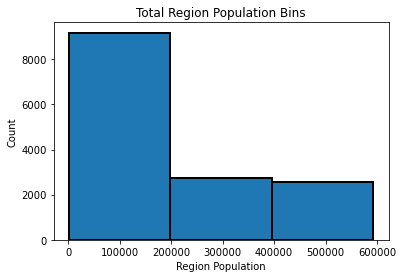

In [159]:
bins = np.linspace(min(df["region_population_value"]), max(df["region_population_value"]), 4)
group_names = ['Low', 'Medium', 'High']
df['region_population'] = pd.cut(df['region_population_value'], bins, labels=group_names, include_lowest=True )

%matplotlib inline

plt.hist(df["region_population_value"], bins = 3, linewidth=2, edgecolor="black")


plt.xlabel("Region Population")
plt.ylabel("Count")
plt.title("Total Region Population Bins")

In [160]:
df.region_population.value_counts()

Low       9174
Medium    2721
High      2570
Name: region_population, dtype: int64

In [161]:
# A quantile based cut can also be used if you want bins of approximately the same size. 
# We will stick with the standard cut for now. 

In [162]:
df.head()
# Bins is overwriting the previously states Not Recorded. NaN is used from here.

,amount_tsh,gps_height,basin,region,region_code,population,public_meeting,permit,extraction_type_class,management,water_quality,quantity,source,status_group,region_population_value,region_population
key_0,,,,,,,,,,,,,,,,
19816,0.0,0,Internal,Shinyanga,17.0,0,True,True,handpump,vwc,soft,enough,machine dbh,non functional,73528.0,Low
54551,0.0,0,Lake Tanganyika,Shinyanga,17.0,0,True,True,handpump,wug,milky,enough,shallow well,non functional,73528.0,Low
53934,0.0,0,Lake Tanganyika,Tabora,14.0,0,True,True,handpump,vwc,salty,seasonal,machine dbh,non functional,NaN,NaN
46144,0.0,0,Lake Victoria,Kagera,18.0,0,True,True,handpump,vwc,soft,enough,shallow well,functional,1248.0,Low
50409,200.0,1062,Lake Nyasa,Ruvuma,10.0,250,True,False,handpump,wug,soft,insufficient,shallow well,functional,279344.0,Medium


In [163]:
df.shape

(16907, 16)

In [164]:
# Let's look at the types and see if we need to do any encoding

In [165]:
df.dtypes

amount_tsh                  float64
gps_height                    int64
basin                        object
region                       object
region_code                 float64
population                    int64
public_meeting               object
permit                       object
extraction_type_class        object
management                   object
water_quality                object
quantity                     object
source                       object
status_group                 object
region_population_value     float64
region_population          category
dtype: object

In [166]:
# Let's encode basin, extraction_type_class, management, water_quality, quantity, and source

In [167]:
# None of them have any missing values. So let's convert them into categories and do label encoding

In [168]:
df["basin"] = df["basin"].astype("category")
df["extraction_type_class"] = df["extraction_type_class"].astype("category")
df["management"] = df["management"].astype("category")
df["water_quality"] = df["water_quality"].astype("category")
df["quantity"] = df["quantity"].astype("category")
df["source"] = df["source"].astype("category")
#df["status_group"] = df["status_group"].astype("category")

df.dtypes

amount_tsh                  float64
gps_height                    int64
basin                      category
region                       object
region_code                 float64
population                    int64
public_meeting               object
permit                       object
extraction_type_class      category
management                 category
water_quality              category
quantity                   category
source                     category
status_group                 object
region_population_value     float64
region_population          category
dtype: object

In [169]:
# Assign the label to a new column
df["basin_code"] = df["basin"].cat.codes
df["extraction_type_code"] = df["extraction_type_class"].cat.codes
df["management_code"] = df["management"].cat.codes
df["water_quality_code"] = df["water_quality"].cat.codes 
df["quantity_code"] = df["quantity"].cat.codes
df["source_code"] = df["source"].cat.codes

df["region_population_bincode"] = df["region_population"].cat.codes
# Set -1 that is NaN to 4 to avoid negative integers.
df.loc[df["region_population_bincode"] == -1, "region_population_bincode"] = 4

#df["status_code"] = df["status_group"].cat.codes


df.head()

,amount_tsh,gps_height,basin,region,region_code,population,public_meeting,permit,extraction_type_class,management,...,status_group,region_population_value,region_population,basin_code,extraction_type_code,management_code,water_quality_code,quantity_code,source_code,region_population_bincode
key_0,,,,,,,,,,,,,,,,,,,,,
19816,0.0,0,Internal,Shinyanga,17.0,0,True,True,handpump,vwc,...,non functional,73528.0,Low,0,0,7,6,1,3,0
54551,0.0,0,Lake Tanganyika,Shinyanga,17.0,0,True,True,handpump,wug,...,non functional,73528.0,Low,3,0,11,3,1,7,0
53934,0.0,0,Lake Tanganyika,Tabora,14.0,0,True,True,handpump,vwc,...,non functional,NaN,NaN,3,0,7,4,3,3,4
46144,0.0,0,Lake Victoria,Kagera,18.0,0,True,True,handpump,vwc,...,functional,1248.0,Low,4,0,7,6,1,7,0
50409,200.0,1062,Lake Nyasa,Ruvuma,10.0,250,True,False,handpump,wug,...,functional,279344.0,Medium,1,0,11,6,2,7,1


In [170]:
# Permit and public_meeting have missing values. Let's replace this with UNKNOWN. Then we can encode them

df[["public_meeting", "permit"]] = df[["public_meeting", "permit"]].fillna("UNKNOWN")
df["public_meeting"] = df["public_meeting"].astype("category")
df["permit"] = df["permit"].astype("category")

df["public_meeting_code"] = df["public_meeting"].cat.codes
df["permit_code"] = df["permit"].cat.codes

df.dtypes

amount_tsh                    float64
gps_height                      int64
basin                        category
region                         object
region_code                   float64
population                      int64
public_meeting               category
permit                       category
extraction_type_class        category
management                   category
water_quality                category
quantity                     category
source                       category
status_group                   object
region_population_value       float64
region_population            category
basin_code                       int8
extraction_type_code             int8
management_code                  int8
water_quality_code               int8
quantity_code                    int8
source_code                      int8
region_population_bincode        int8
public_meeting_code              int8
permit_code                      int8
dtype: object

In [171]:
df.corr()

,amount_tsh,gps_height,region_code,population,region_population_value,basin_code,extraction_type_code,management_code,water_quality_code,quantity_code,source_code,region_population_bincode,public_meeting_code,permit_code
amount_tsh,1.000000,0.167736,-0.036504,0.032593,0.058150,-0.012367,-0.002810,-0.026683,0.023113,-0.010649,-0.132829,-0.027319,0.005147,0.021486
gps_height,0.167736,1.000000,0.051082,0.242883,0.259250,-0.069169,0.187721,-0.144030,0.073515,-0.052190,-0.314044,-0.133288,0.040886,0.148832
region_code,-0.036504,0.051082,1.000000,-0.129881,-0.520577,-0.527997,0.019202,0.230016,0.072676,-0.061628,-0.009009,-0.315156,0.104925,0.067129
population,0.032593,0.242883,-0.129881,1.000000,0.260921,0.120219,0.005856,-0.099435,-0.048054,0.024526,-0.035979,-0.011646,0.015537,0.024457
region_population_value,0.058150,0.259250,-0.520577,0.260921,1.000000,0.401258,0.088568,-0.254725,-0.078567,0.113085,0.052063,0.962438,0.010999,0.182277
basin_code,-0.012367,-0.069169,-0.527997,0.120219,0.401258,1.000000,0.059539,-0.167735,-0.066038,-0.012019,0.011001,-0.055511,0.039207,0.000085
extraction_type_code,-0.002810,0.187721,0.019202,0.005856,0.088568,0.059539,1.000000,-0.122764,0.021991,-0.013395,-0.055727,-0.002668,0.055568,0.072006
management_code,-0.026683,-0.144030,0.230016,-0.099435,-0.254725,-0.167735,-0.122764,1.000000,0.007115,-0.041091,0.140874,-0.231626,0.120121,-0.174374
water_quality_code,0.023113,0.073515,0.072676,-0.048054,-0.078567,-0.066038,0.021991,0.007115,1.000000,-0.008954,0.031878,-0.042863,0.001531,-0.043152
quantity_code,-0.010649,-0.052190,-0.061628,0.024526,0.113085,-0.012019,-0.013395,-0.041091,-0.008954,1.000000,0.099696,0.087244,-0.037357,0.018269


In [172]:
# Visualising the dataset - Q1

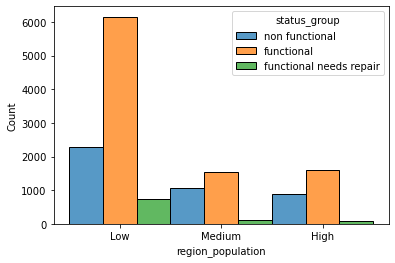

In [173]:
sns.histplot(data=df, x='region_population', hue='status_group', multiple='dodge', stat='count')
plt.show()

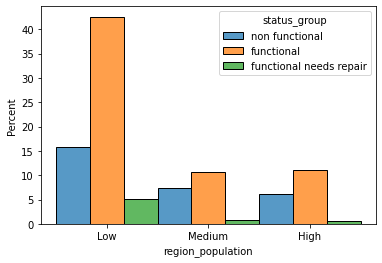

In [174]:
sns.histplot(data=df, x='region_population', hue='status_group', multiple='dodge', stat='percent')
plt.show()

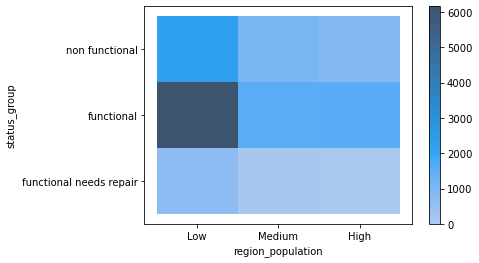

In [175]:
sns.histplot(data=df, x='region_population', y='status_group', cbar=True)
plt.show()

In [176]:
# Let's train some models and see which is ideal to use (that is not Random Forest as Joy is doing that)

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [178]:
attributes = ["amount_tsh","gps_height","region_code","population","basin_code","extraction_type_code","management_code",
         "water_quality_code","quantity_code","source_code","region_population_bincode",
          "public_meeting_code","permit_code"]
X = df[attributes] #x - features
y = df["status_group"] #y - labels
labels = df["status_group"].unique()

In [179]:
# Let's try KNN Classification

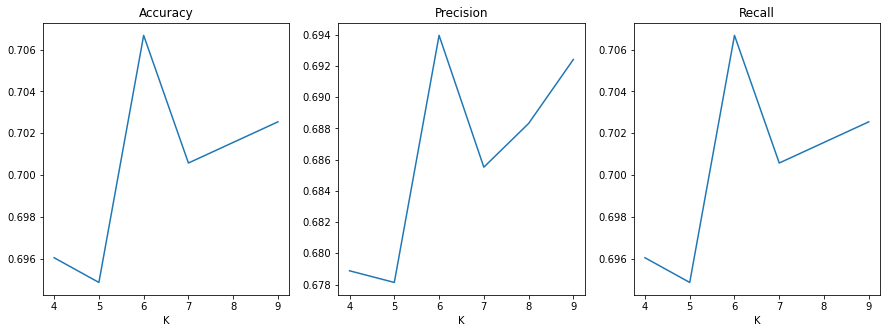

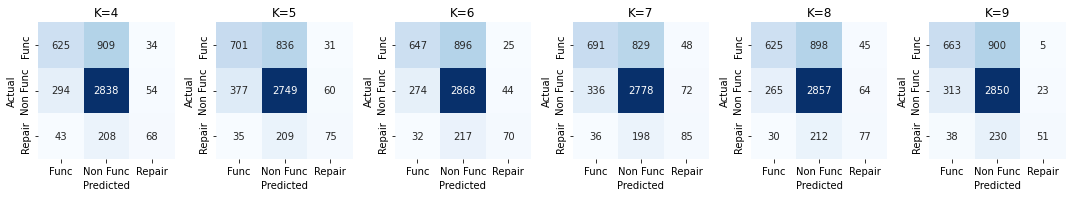

In [180]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

k_values = range(4, 10)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize arrays to store evaluation metrics
accuracy = np.zeros(len(k_values))
precision = np.zeros(len(k_values))
recall = np.zeros(len(k_values))
conf_matrices = []

# Perform KNN classification for each value of K
for i, k in enumerate(k_values):
    # Fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = knn.predict(X_test)
    
    # Compute evaluation metrics
    accuracy[i] = accuracy_score(y_test, y_pred)
    precision[i] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall[i] = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=labels))
    
# Plot evaluation metrics as a function of K
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(k_values, accuracy)
axs[0].set_title('Accuracy')

axs[1].plot(k_values, precision)
axs[1].set_title('Precision')

axs[2].plot(k_values, recall)
axs[2].set_title('Recall')

for ax in axs:
    ax.set_xlabel('K')
    ax.set_xticks(k_values)

# Plot confusion matrices
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 3))
axis_labels = ["Func", "Non Func", "Repair"] # labels for axis - labels var was too long for confusion matrix
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[i], cbar=False, square=True, xticklabels=axis_labels, yticklabels=axis_labels)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].set_title(f'K={k_values[i]}')

plt.tight_layout()
plt.show()

In [181]:
# K = 6 gives us the best accuracy. 

In [182]:
# Let's try SVM to see

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [184]:
# Train a SVM model with default kernel
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Calculate the precision and recall
precision = precision_score(y_test, y_pred,average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred,average='weighted',zero_division=1)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.726741176116338
Recall: 0.7122018529469741


In [185]:
# Train SVM models with different kernels
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Predict the labels for the testing set
    y_pred = clf.predict(X_test)

    # Calculate the precision and recall
    precision = precision_score(y_test, y_pred,average='weighted',zero_division=1)
    recall = recall_score(y_test, y_pred,average='weighted',zero_division=1)
    accuracy = clf.score(X_test, y_test)

    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}\n")

Kernel: linear
Accuracy: 0.628
Precision: 0.766
Recall: 0.628

Kernel: poly
Accuracy: 0.686
Precision: 0.696
Recall: 0.686

Kernel: sigmoid
Accuracy: 0.506
Precision: 0.490
Recall: 0.506

Kernel: rbf
Accuracy: 0.712
Precision: 0.727
Recall: 0.712



In [186]:
# Random Forest

In [187]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.722


In [188]:
# Multiple Folds
from sklearn.model_selection import cross_val_score

# Create a Random Forest model with 500 trees
clf = RandomForestClassifier(n_estimators=500, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)

# Print the accuracy scores for each fold and the mean accuracy score
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.3f}")
print(f"Mean accuracy: {scores.mean():.3f}")

Fold 1: 0.729
Fold 2: 0.716
Fold 3: 0.716
Fold 4: 0.720
Fold 5: 0.713
Mean accuracy: 0.719
